<a href="https://colab.research.google.com/github/Rajesh2015/inn-hotels-bookings/blob/main/inn_hotel_bookings_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Inn Hotels Bookings
#### Context
A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost, which benefits hotel guests. However, it is a less desirable and potentially revenue-diminishing factor for hotels. Such losses are particularly high for last-minute cancellations.

New technologies involving online booking channels have dramatically changed customers' booking possibilities and behavior, adding further complexity to how hotels manage cancellations. These are no longer limited to traditional booking and guest characteristics.

Cancellations impact hotels in several ways:
1. **Loss of resources** (revenue) when the hotel cannot resell the room.
2. **Additional distribution costs**, including increased commissions or paying for publicity to help sell these rooms.
3. **Last-minute price reductions** to resell a room, lowering the profit margin.
4. **Increased human resource needs** to manage guest arrangements.

#### Objective
The rising number of cancellations calls for a Machine Learning-based solution to predict which bookings are likely to be canceled. INN Hotels Group, a hotel chain in Portugal, is facing problems with high booking cancellations. They have sought out your firm for a data-driven solution. As a data scientist, your task is to analyze the provided data to identify the factors most influential on booking cancellations. You will then build a predictive model to anticipate cancellations in advance, helping the hotel formulate profitable cancellation and refund policies.

---
### Data Dictionary

The data contains the different attributes of customers' booking details. Below is a detailed description of the fields in the dataset.

- **Booking_ID**: The unique identifier of each booking.
- **no_of_adults**: Number of adults.
- **no_of_children**: Number of children.
- **no_of_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.
- **no_of_week_nights**: Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel.
- **type_of_meal_plan**: Type of meal plan booked by the customer:
  - Not Selected – No meal plan selected.
  - Meal Plan 1 – Breakfast.
  - Meal Plan 2 – Half board (breakfast and one other meal).
  - Meal Plan 3 – Full board (breakfast, lunch, and dinner).
- **required_car_parking_space**: Does the customer require a car parking space? (0 - No, 1 - Yes).
- **room_type_reserved**: Type of room reserved by the customer. The values are encoded by INN Hotels Group.
- **lead_time**: Number of days between the date of booking and the arrival date.
- **arrival_year**: Year of arrival date.
- **arrival_month**: Month of arrival date.
- **arrival_date**: Day of the month of arrival.
- **market_segment_type**: Market segment designation.
- **repeated_guest**: Is the customer a repeated guest? (0 - No, 1 - Yes).
- **no_of_previous_cancellations**: Number of previous bookings canceled by the customer before the current booking.
- **no_of_previous_bookings_not_canceled**: Number of previous bookings not canceled by the customer before the current booking.
- **avg_price_per_room**: Average price per day of the reservation; prices of the rooms are dynamic (in euros).
- **no_of_special_requests**: Total number of special requests made by the customer (e.g., high floor, room view, etc.).
- **booking_status**: Flag indicating if the booking was canceled or not.


In [90]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Library to help with statistical analysis
import scipy.stats as stats
from mpl_toolkits.mplot3d import axes3d
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
)
# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## **Loading the dataset**

In [2]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# root path for the sample data
path='/content/drive/MyDrive/Python Course'

In [4]:
# load the data in to panda dataframe
inn_hotel_df=pd.read_csv(f'{path}/INNHotelsGroup.csv')

In [5]:
# copying data to another variable to avoid any changes to original data
df = inn_hotel_df.copy()

In [6]:
pellete='Set2'
colors = sns.color_palette(pellete)  # Get Set2 color palette for future use
sns.set(style="darkgrid") # Set grid style

## **Data Overview**

- Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- Get information about the number of rows and columns in the dataset
- Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- Check the statistical summary of the dataset to get an overview of the numerical columns of the data
- Check for missing values

In [7]:
# looking at head (5 observations)
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [8]:
df.shape

(36275, 19)

### Observations:
There are 19 columns and 36275 rows in total

In [9]:
# Shape of dataset
print(f"There are {df.shape[1]} columns and {df.shape[0]} rows in dataset")

There are 19 columns and 36275 rows in dataset


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

###Observations:
Data set contain 18 columns.
Below is the summary
#### Dataset Summary

| Column                                | Data Type | Non-Null Count | Description |
|---------------------------------------|-----------|----------------|-------------|
| Booking_ID                            | Object    | 36275          | Unique identifier of each booking |
| no_of_adults                          | int64     | 36275          | Number of adults in the booking |
| no_of_children                        | int64     | 36275          | Number of children in the booking |
| no_of_weekend_nights                  | int64     | 36275          | Number of weekend nights (Saturday or Sunday) booked |
| no_of_week_nights                     | int64     | 36275          | Number of weeknights (Monday to Friday) booked |
| type_of_meal_plan                     | Object    | 36275          | Type of meal plan selected |
| required_car_parking_space            | int64     | 36275          | Whether a car parking space was required (0 - No, 1 - Yes) |
| room_type_reserved                    | Object    | 36275          | Reserved room type (ciphered) |
| lead_time                             | int64     | 36275          | Days between booking and arrival |
| arrival_year                          | int64     | 36275          | Year of the arrival date |
| arrival_month                         | int64     | 36275          | Month of the arrival date |
| arrival_date                          | int64     | 36275          | Day of the arrival date |
| market_segment_type                   | Object    | 36275          | Segment of the market (e.g., direct, corporate, etc.) |
| repeated_guest                        | int64     | 36275          | Whether the guest is a repeated customer (0 - No, 1 - Yes) |
| no_of_previous_cancellations          | int64     | 36275          | Number of previously canceled bookings |
| no_of_previous_bookings_not_canceled  | int64     | 36275          | Number of previous bookings not canceled |
| avg_price_per_room                    | float64   | 36275          | Average price per room (in euros) |
| no_of_special_requests                | int64     | 36275          | Number of special requests made by the guest |
| booking_status                        | Object    | 36275          | Booking status (canceled or not) |



In [11]:
df.describe(exclude=['object']).T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


### Observation

The dataset consists of **36,275 hotel bookings**. Key statistics from some of the important features are as follows:

- **Number of Adults**: On average, there are around **1.84 adults** per booking, with most bookings including two adults.
- **Number of Children**: The mean number of children is low, around **0.11**, indicating that most bookings are made for adults only.
- **Weekend Nights**: Guests typically book for **0.81 weekend nights**, with most bookings being for one or two weekend nights.
- **Week Nights**: The average number of week nights per booking is around **2.2**.
- **Lead Time**: The mean lead time (days between booking and arrival) is approximately **85 days**, indicating that bookings are usually made well in advance.
- **Arrival Year**: Most bookings are for the year **2018**.
- **Arrival Month**: Most bookings are for the month **October** may be due to good weather during that time.
- **Previous Cancellations**: Most guests have not canceled bookings before, as shown by a mean of **0.023 cancellations**.
- **Average Price Per Room**: The average room price is around **$103**, with prices varying significantly.Max price is **540** its quite high if we compared with other bookings .We might need to check for possible outliers.
- **Special Requests**: Guests make an average of **0.62 special requests** per booking, indicating that many bookings do not involve any special requests and max is 5 which seems to be some outliers in this column.

In [12]:
df.describe(exclude=[np.number]).T

,count,unique,top,freq
Booking_ID,36275,36275,INN00001,1
type_of_meal_plan,36275,4,Meal Plan 1,27835
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
booking_status,36275,2,Not_Canceled,24390


In [13]:
df.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


### Observations:
There is no null value in dataset

In [14]:
has_duplicates = df.duplicated().any()

print(f"Does the DataFrame have duplicates? {has_duplicates}")

Does the DataFrame have duplicates? False


In [15]:
df['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [16]:
df['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [17]:
df['market_segment_type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [18]:
df['booking_status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [19]:
# Dropping booking id as it's just an id for booking does not have much significance
df.drop('Booking_ID',axis=1,inplace=True)

### Utils

In [20]:
def plot_bar_chart_percentage(df, column_name, xlabel, pellete, bar_width=0.6):
    """
    Plots the percentage distribution of a specified categorical column in a DataFrame.

    Parameters:
    - df: DataFrame containing the data.
    - column_name: The name of the column to analyze.
    - colors: List of colors for the bar plot.
    - figsize: Tuple specifying the figure size.
    - bar_width: Width of the bars in the bar plot.
    """
    # Calculate the percentage of each category in the specified column
    percentages = df[column_name].value_counts(normalize=True)*100
    percentages = percentages.reset_index().rename(columns={ column_name: column_name, 'proportion': 'percent'})
    n=df[column_name].nunique()
    # Increase figure size for better readability
    plt.figure(figsize=(n+1,6))

    # Plot the bar plot with reduced bar width
    ax=sns.barplot(x=column_name, y='percent', data=percentages, palette=pellete,hue=column_name, width=bar_width)

    # Annotate the plot with the count values
    annotate_chart(plt, ax)

    # Set labels and title
    plt.ylabel('Percentage')
    plt.xlabel(xlabel)
    plt.title(f'Overview of {xlabel}')
    plt.xticks(rotation=45)

    # Show the plot
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.legend([],[], frameon=False)
    plt.show()


In [21]:
def plot_pie_chart_with_legend(df, column, title=None, colors=None):
    """
    Creates a pie chart with a legend showing the share of each category in a column.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - column (str): The column name for which the pie chart will be created.
    - title (str, optional): Title of the pie chart. Default is "Market Segment Proportions".
    - colors (list, optional): List of colors for the pie chart wedges. If not provided, default pastel colors will be used.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib plot object.
    """
    # Calculate proportions
    proportions = df[column].value_counts(normalize=True)

    # Create the pie chart without annotations
    plt.pie(proportions, labels=None, colors=colors, wedgeprops={'edgecolor': 'white'})

    # Generate legend labels with percentages
    legend_labels = [f'{label}: {percent:.1%}' for label, percent in zip(proportions.index, proportions)]

    # Add the legend
    plt.legend(legend_labels, loc='best', title=column.replace('_', ' ').title())

    # Add title and adjust layout
    plt.title(title)
    plt.tight_layout()

    # Return the plot
    return plt

In [22]:
def plot_histogram_and_boxplot(df, column, xlabel, ylabel, title):
    """
    Plots a histogram with KDE and a box plot for a specified column in a DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    column (str): The column name for which the plots are to be drawn.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    title (str): The title for the graph.
    Returns:
    None
    """
    # Calculate percentiles
    q25 = df[column].quantile(0.25)
    q50 = df[column].quantile(0.50)
    q75 = df[column].quantile(0.75)
    mean_value = df[column].mean()
    # Create the figure and set the size
    f, (hist, box) = plt.subplots(nrows=2, sharex=True, figsize=(8, 10))

    # Create the histogram with KDE
    sns.histplot(data=df, x=column, ax=hist, kde=True, legend=True, color='lightcoral')
    hist.axvline(mean_value, color='peru', linestyle=':', label='Mean')
    hist.axvline(q25, color='green', linestyle='--', label='25th percentile')
    hist.axvline(q50, color='blue', linestyle='-', label='50th percentile (Median)')
    hist.axvline(q75, color='purple', linestyle='--', label='75th percentile')
    hist.set_ylabel(ylabel)
    hist.legend()

    # Create the box plot in a subplot below the histogram
    sns.boxplot(data=df, x=column, ax=box, color='lightcoral')
    box.axvline(mean_value, color='peru', linestyle=':', label=f'Mean: {mean_value:.2f}')
    box.axvline(q25, color='green', linestyle='--', label=f'25th percentile: {q25:.2f}')
    box.axvline(q50, color='blue', linestyle='-', label=f'50th percentile: {q50:.2f}')
    box.axvline(q75, color='purple', linestyle='--', label=f'75th percentile: {q75:.2f}')

    # Setting the x-label and title on the shared axis and figure
    box.set_xlabel(xlabel)
    f.suptitle(title)

    # Adjust layout and show the combined plots
    f.tight_layout(rect=[0, 0, 1, 0.95])
    box.legend()  # Add legend to the box plot for the percentiles


In [23]:
def draw_count_plot(df, x, xlabel, ylabel, title, hue=None):
    """
    Draws a count plot for a specified column in a DataFrame.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - x (str): The column name to be used for the x-axis categories.
    - xlabel (str): The label for the x-axis.
    - ylabel (str): The label for the y-axis.
    - title (str): The title for the plot.
    - hue (str, optional): The column name to be used for hue (categorical separation). Default is None.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib plot object.
    """
    # Create the plot
    count=df[x].nunique()
    plt.figure(figsize=(count + 1, 4))
    ax = sns.countplot(data=df, x=x, hue=hue, palette='Set2')
    plt.xticks(rotation=45)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Annotate the plot with the count values
    annotate_chart(plt, ax)

    return plt

In [24]:
def annotate_chart(plot, ax):
    """
    Annotates a chart with the height of each bar.

    Parameters:
    - plot (matplotlib.pyplot): The matplotlib plot object.
    - ax (Axes): The Axes object to annotate.
    """
    for p in ax.patches:
        height = p.get_height()

        # Only annotate if height is significant, and avoid zero or near-zero annotations
        if height > 0.001:
            plot.annotate(f'{format(height, ".1f")}% ',          # Annotate with 1 decimal places
                          (p.get_x() + p.get_width() / 2., height),  # Position the annotation at the top of the bar
                          ha='center', va='center',       # Center the annotation
                          xytext=(0, 4),                  # Small offset to avoid overlapping with the bar
                          textcoords='offset points')


In [25]:
def plot_stacked_bar_with_annotations(df, x, y, normalize='index', figsize=(8, 6), show_legend=True,show_annot=True, ax=None):
    """
    Creates a stacked bar plot with pastel colors and annotates each bar with proportion values.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - x (str): The column name to be used for the x-axis categories.
    - y (str): The column name to be used for the y-axis categories.
    - normalize (str, optional): Normalizes the values to proportions. Default is 'index'.
    - figsize (tuple, optional): The size of the figure. Default is (8, 6).
    - show_legend (bool, optional): Whether to show the legend. Default is True.
    - ax (matplotlib.axes.Axes, optional): An existing axes object for plotting. Default is None.

    Returns:
    - ax (matplotlib.axes.Axes): The axes object containing the plot.
    """
    # Create the crosstab
    crosstab = pd.crosstab(df[x], df[y], normalize=normalize) * 100
    crosstab.round(1)
    # Create the plot on the provided ax or create a new one if ax is None
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)

    crosstab.plot(kind='bar', stacked=True, ax=ax, color=['#66c2a5', '#fc8d62'])

    # Add labels to the axes
    formatted_string = ' '.join(word.capitalize() for word in x.split('_'))
    ax.set_xlabel(formatted_string)
    ax.set_ylabel('Proportion' if normalize else 'Count')
    ax.set_title(f'Proportion of {y} by {x}' if normalize else f'Count of {y} by {x}')

    # Annotate the bars with proportion or count values
    if show_annot:
      for container in ax.containers:
          ax.bar_label(container, label_type='center', fmt='%.1f', labels=[f'{v:.1f}' if v > 0 else '' for v in container.datavalues])


    # Show or remove the legend based on the show_legend parameter
    if not show_legend:
        ax.legend().remove()

    return ax

In [26]:
def create_stacked_bar_subplots(df, columns, y, n_cols=2):
    """
    Creates stacked bar subplots for the specified columns with a common legend.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - columns (list): List of column names to plot on the x-axis.
    - y (str): The column name to plot on the y-axis.
    - n_cols (int, optional): Number of columns for the subplot layout (default is 2).
    """
    n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed

    # Create a figure with adjusted size
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Loop through each column and create a subplot for it
    for i, col in enumerate(columns):
        ax = axes[i]  # Get the correct axis
        plot_stacked_bar_with_annotations(df=df, x=col, y=y, ax=ax,show_legend=False)

    # Hide any unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Get the handles and labels from one of the plots (to add the common legend)
    handles, labels = axes[0].get_legend_handles_labels()

    # Add a common legend below the subplots
    fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.05))

    # Adjust layout to avoid overlap
    plt.tight_layout(pad=3.0, h_pad=3.0, w_pad=3.0)

    # Show the plot
    plt.show()

In [27]:
def plot_boxplot(df, x_col, y_col, hue_col=None, title=None, xlabel=None, figsize=(8, 5), xticks_rotation=90):
    """
    Creates a box plot to visualize the relationship between variables.

    Parameters:
    - df: pandas DataFrame containing the data.
    - x_col: str, column name for the x-axis.
    - y_col: str, column name for the y-axis.
    - hue_col: str, column name for grouping by color (optional).
    - title: str, title of the plot (optional).
    - xlabel: str, label for the x-axis (optional).
    - figsize: tuple, size of the figure (default is (8, 5)).
    - xticks_rotation: int, rotation angle for x-axis tick labels (default is 90).
      Returns:
    - plt (matplotlib.pyplot): The matplotlib plot object with annotations.
    """

    plt.figure(figsize=figsize)  # Set the figure size
    bxp = sns.boxplot(data=df, x=x_col, y=y_col, hue=hue_col,palette="Set2")  # Create the box plot

    if xlabel:
        bxp.set_xlabel(xlabel)  # Set x-axis label if provided
    if title:
        bxp.axes.set_title(title)  # Set the plot title if provided

    plt.xticks(rotation=xticks_rotation)  # Rotate x-axis labels
    return plt


In [28]:
def draw_box_plot_with_legend(df, x, xlabel, color='red'):
    """
    Draws a box plot with a vertical line indicating the mean value and includes a legend.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the data to plot.
    - x (str): The name of the column in the DataFrame to be plotted.
    - xlabel (str): The label for the x-axis.
    - color (str, optional): The color of the box plot. Default is 'red'.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib pyplot object for further customization or saving.
    """
    mean_value = df[x].mean()
    sns.boxplot(data=df, x=x, color=color)
    plt.xlabel(xlabel)
    plt.axvline(mean_value, color='green', linestyle=':', label=f'Mean: {mean_value:.2f}')
    plt.legend()
    return plt

In [29]:
def plot_box_plot_side_by_side(df, x, xlabel, category_col, color='red'):
    """
    Plots side-by-side box plots for different categories in a DataFrame.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the data to plot.
    - x (str): The name of the column in the DataFrame to be plotted.
    - xlabel (str): The label for the x-axis.
    - category_col (str): The column name in the DataFrame used to categorize the data.
    - color (str, optional): The color of the box plot. Default is 'red'.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib pyplot object for further customization or saving.
    """
    # Extract unique categories
    categories = df[category_col].unique()

    # Create subplots with 1 row and the number of columns equal to the number of categories
    fig, axes = plt.subplots(1, len(categories), figsize=(12, 6))

    # Loop over each category and plot
    for i, category in enumerate(categories):
        plt.sca(axes[i])  # Set the current axes
        subset = df[df[category_col] == category]
        draw_box_plot_with_legend(subset, x, xlabel, color=color)
        axes[i].set_title(f'{category.capitalize()}')

    plt.tight_layout()
    return plt

In [30]:
def create_catplot_with_annotations(df, x, hue, col, colors, height=4, aspect=1, title="Catplot with Annotations", annotation_color='b'):
    """
    Creates a catplot with count kind, a color palette, axis labels, title, and annotations.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    x (str): The name of the column for the x-axis.
    hue (str): The name of the column for hue.
    col (str): The name of the column for creating subplots.
    colors (tuple): A tuple of two colors for the palette.
    height (int): The height of each facet (default is 4).
    aspect (float): Aspect ratio of each facet (default is 1).
    title (str): The title of the plot (default is "Catplot with Annotations").
    annotation_color (str): The color of the annotations (default is 'b').
    """
    # Create the catplot
    catplot = sns.catplot(data=df, x=x, hue=hue, col=col, kind='count', height=height, aspect=aspect, palette=colors)

    # Set axis labels and title
    catplot.set_axis_labels(x, 'Count')
    catplot.set_titles(col_template="{col_name}")
    catplot.fig.suptitle(title, y=1.02)  # Title with a bit of padding

    # Add annotations with specified color
    for ax in catplot.axes.flat:
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                        color=annotation_color)

In [31]:
def distribution_plot_wrt_target(data, predictor, target, xlabel1, xlabel2):
    """
    Plots the distribution of a predictor variable with respect to a target variable.

    This function creates a 2x2 grid of plots, including:
    1. Histograms with KDE for each unique value of the target variable.
    2. A boxplot showing the distribution of the predictor variable grouped by the target variable.
    3. A boxplot showing the distribution of the predictor variable grouped by the target variable without outliers.

    Parameters:
    - data (DataFrame): The input DataFrame containing the data.
    - predictor (str): The name of the predictor variable (column) to visualize.
    - target (str): The name of the target variable (column) to group the data by.
    - xlabel1 (str): Label for the x-axis of the first histogram.
    - xlabel2 (str): Label for the x-axis of the second histogram.

    Returns:
    - None: Displays the plots but does not return any values.
    """

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    # Histogram for the first unique target value
    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color=colors[0],
        stat="density",
    )
    axs[0, 0].set_xlabel(xlabel1)

    # Histogram for the second unique target value
    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color=colors[1],
        stat="density",
    )
    axs[0, 1].set_xlabel(xlabel2)

    # Boxplot with outliers
    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], color=colors[0])

    # Boxplot without outliers
    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        color=colors[1],
        showmeans=True
    )

    plt.tight_layout()
    plt.show()


In [89]:
def plot_decision_boundary(X, y, clf):
  zero_one_colourmap_pts = ListedColormap(('red', 'green'))
  zero_one_colourmap_boundary = ListedColormap(('#FFCCCB', '#90EE90'))
  X_set, y_set = X, y
  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                 stop = X_set[:, 0].max() + 1,
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1,
                                 stop = X_set[:, 1].max() + 1,
                                 step = 0.01))
  plt.figure(figsize=(10,6))
  plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75,
               cmap = zero_one_colourmap_boundary)
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap_pts)(i), label = j)
  plt.title('SVM Decision Boundary')
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.legend()
  return plt.show()

In [84]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_sklearn(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = (model.predict_proba(predictors))[:, 1] > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [85]:
# defining a function to plot the confusion_matrix of a classification model
def confusion_matrix_sklearn(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    # checking which probabilities are greater than threshold
    pred_temp = (model.predict_proba(predictors))[:, 1] > threshold
    # rounding off the above values to get classes
    y_pred = np.round(pred_temp)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

##Univariate Analysis

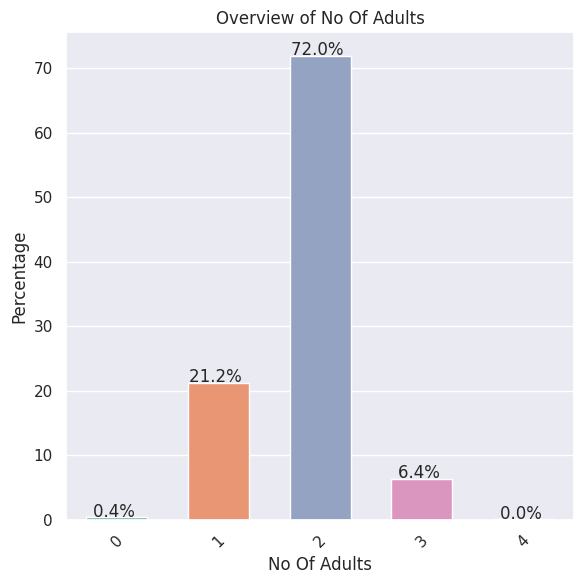

In [32]:
# Barplot on Percentage Of no of adults in bookings
plot_bar_chart_percentage(df=df, column_name='no_of_adults',xlabel='No Of Adults',pellete=pellete)


###Observations:
Around 72% booking are for two adults

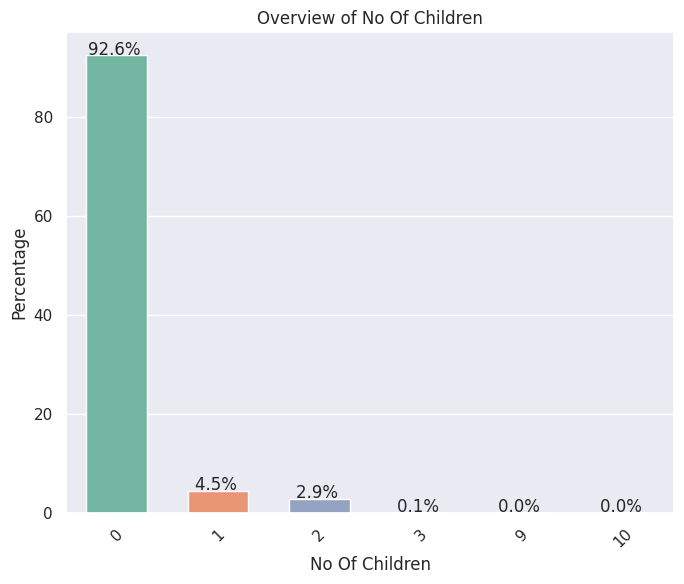

In [33]:
# Barplot on Percentage Of no_of_children in bookings
plot_bar_chart_percentage(df=df, column_name='no_of_children',xlabel='No Of Children',pellete=pellete)

### Observations:
Most of the bookings are without any children approximately  around 92.6%.There are some booking with 9 and 10 children too.Detailed view below

In [34]:
df['no_of_children'].value_counts()

,count
no_of_children,
0,33577
1,1618
2,1058
3,19
9,2
10,1


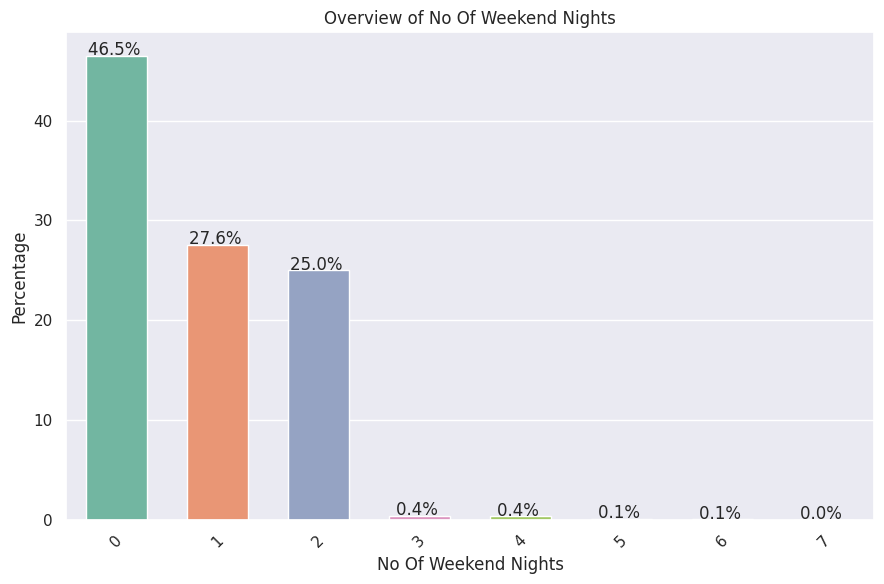

In [35]:
# Barplot on Percentage of no_of_weekend_nights in bookings
plot_bar_chart_percentage(df=df, column_name='no_of_weekend_nights',xlabel='No Of Weekend Nights', pellete=pellete)

### Observations:
#### Percentage of Number of Weekend Nights

| No of Weekend Nights | Percentage (%) |
|----------------------|----------------|
| 0                    | 46.5%          |
| 1                    | 27.6%          |
| 2                    | 25.0%          |
| 3                    | 0.4%           |
| 4                    | 0.4%           |
| 5                    | 0.1%           |
| 6                    | 0.1%           |
| 7                    | 0.0%           |

### Description:
The chart above shows the distribution of hotel bookings based on the number of weekend nights. The data reveals that:

- **46.5%** of bookings have **0 weekend nights**.
- **27.6%** of bookings have **1 weekend night**.
- **25.0%** of bookings have **2 weekend nights**.
- Only a small percentage of bookings include **3 or more weekend nights** (0.4% or less per category).

This distribution suggests that most bookings tend to avoid weekend nights, with shorter stays being predominant.


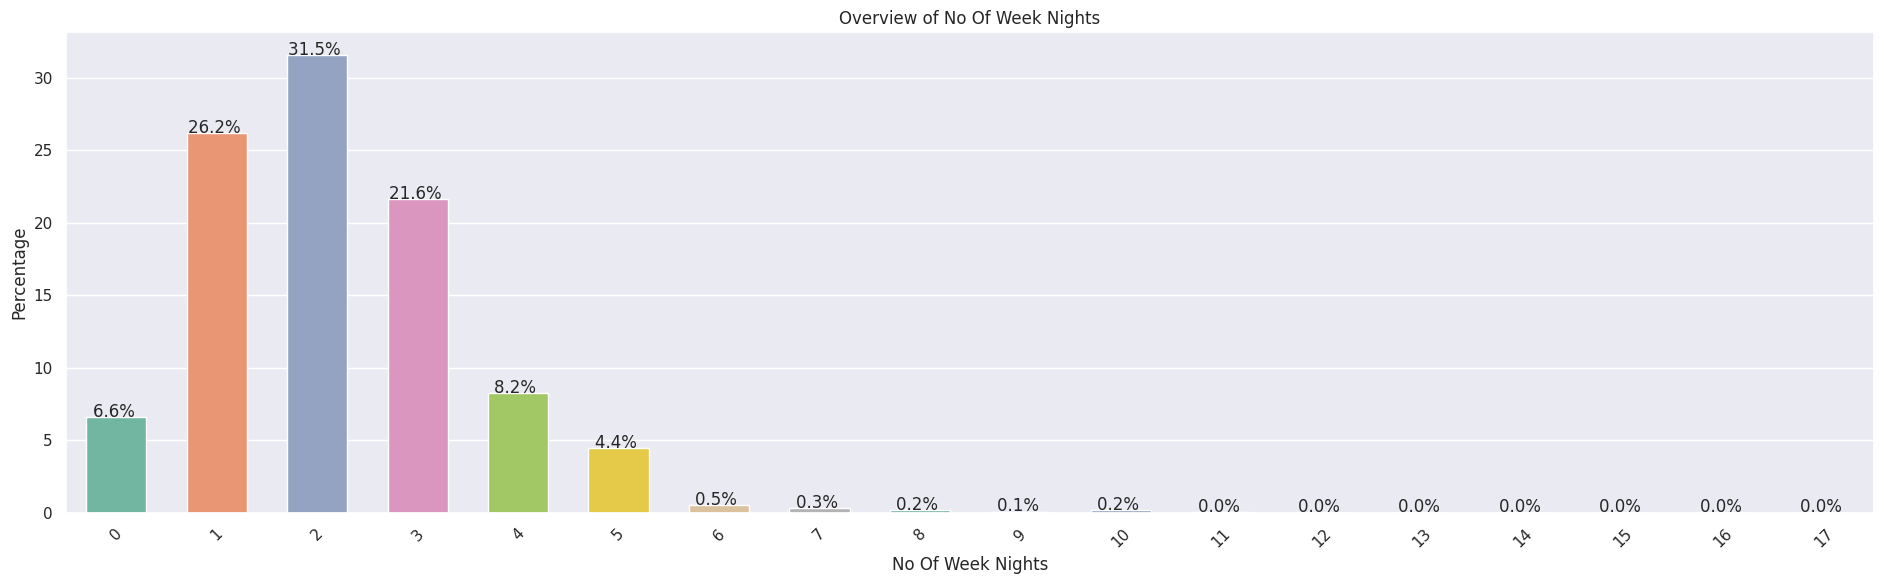

In [36]:
# Barplot on Percentage of no_of_week_nights in bookings
plot_bar_chart_percentage(df=df, column_name='no_of_week_nights',xlabel='No Of Week Nights',pellete=pellete)

### Observations:
The majority of bookings are made for 2 days of week nights, followed by 1 day of week night stays.

very less bookings are made for week night stays longer than 5 days.

In [37]:
# Details of the above plot in tablular format
df['no_of_week_nights'].value_counts(normalize=True)

,proportion
no_of_week_nights,
2,0.315479
1,0.261558
3,0.216099
4,0.082426
0,0.065803
5,0.044493
6,0.005210
7,0.003115
10,0.001709


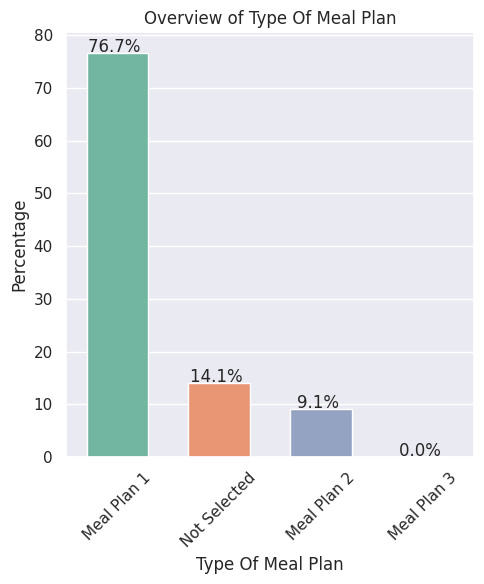

In [38]:
# Barplot on preffered Meal Plan
plot_bar_chart_percentage(df=df, column_name='type_of_meal_plan',xlabel='Type Of Meal Plan',pellete=pellete)

### Observations:
Around  76% of people prefer Meal Plan 1, while 14% of people do not select any meal plan.Small percentage of people prefer meal plan 2 (9.1%).very  negligible percentage prefer meal plan 3

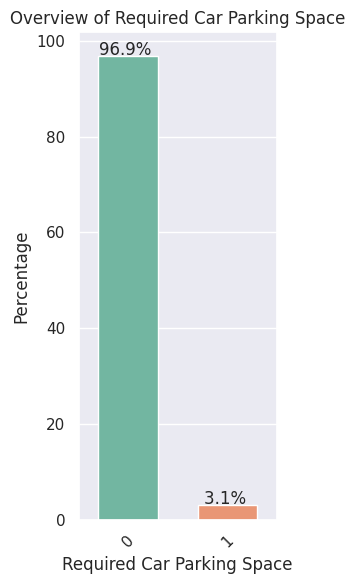

In [39]:
# Barplot on no of guests wanted  car parking space
plot_bar_chart_percentage(df=df, column_name='required_car_parking_space',xlabel='Required Car Parking Space',pellete=pellete)

### Observations:
Most of the guests (96.9%) doesnot need parking space

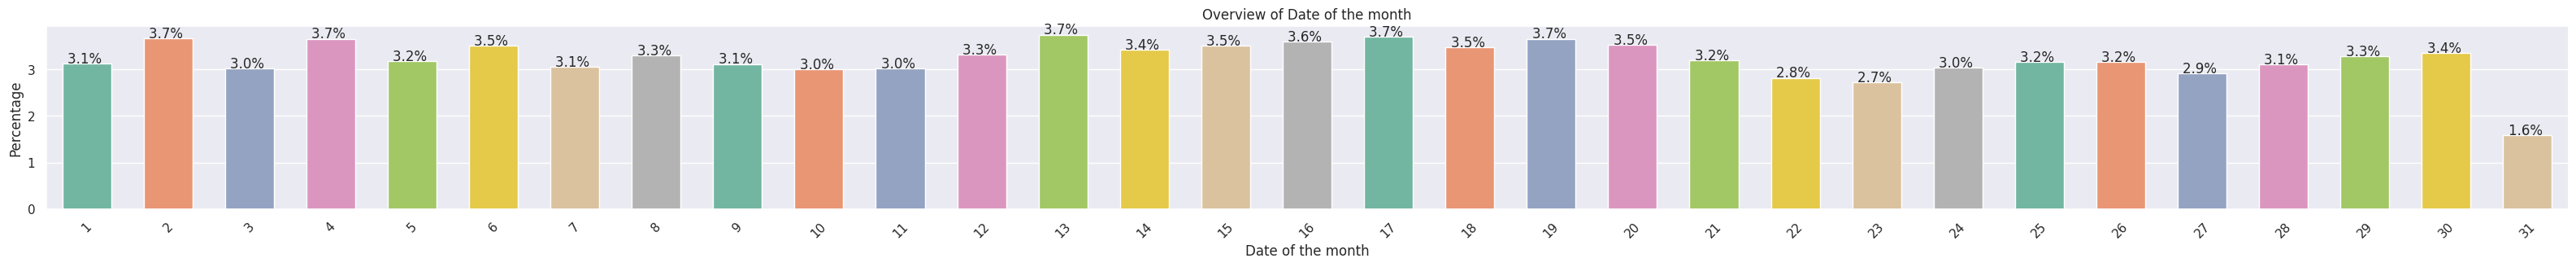

In [40]:
# Bar plot on arrival Date
plot_bar_chart_percentage(df=df, column_name='arrival_date',xlabel='Date of the month',pellete=pellete)

###Observations:
There is no significant date where we can see more guest .So there is not much difference across the dates

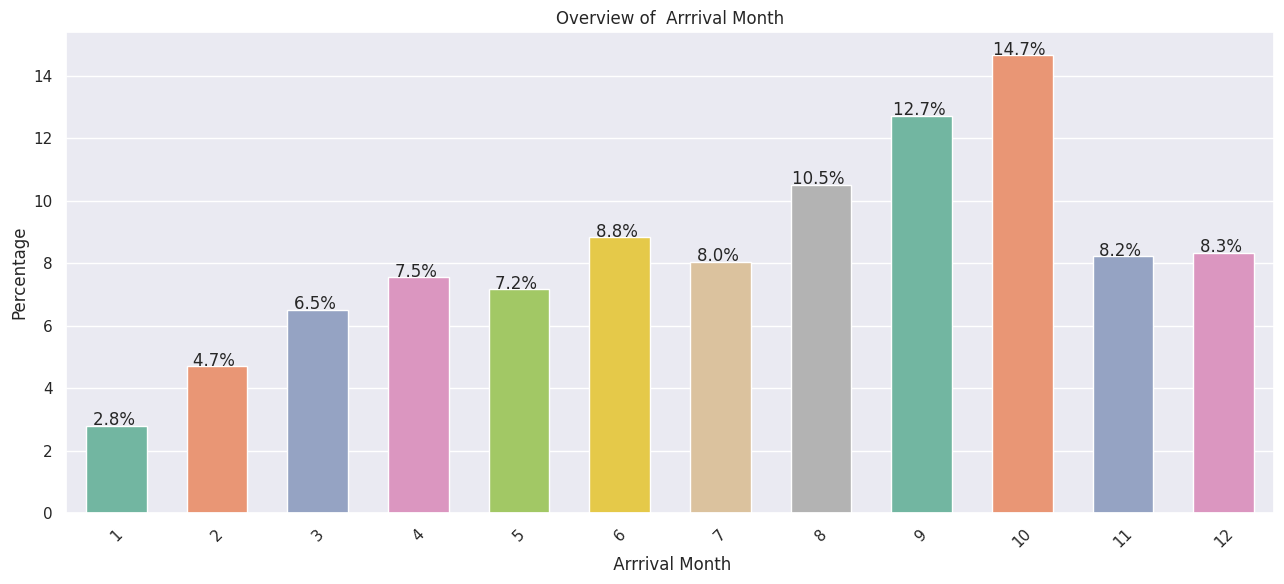

In [41]:
# Bar plot on arrival month
plot_bar_chart_percentage(df=df, column_name='arrival_month',xlabel=' Arrrival Month',pellete=pellete)

### Table of Percentage by Arrival Month

| **Month** | **Percentage (%)** |
|-----------|--------------------|
| 1         | 2.8                |
| 2         | 4.7                |
| 3         | 6.5                |
| 4         | 7.5                |
| 5         | 7.2                |
| 6         | 8.8                |
| 7         | 8.0                |
| 8         | 10.5               |
| 9         | 12.7               |
| 10        | 14.7               |
| 11        | 8.2                |
| 12        | 8.3                |

### Observations:

1. **Highest Percentage:** October has the highest percentage of arrivals (14.7%).
2. **Lowest Percentage:** January shows the lowest percentage of arrivals (2.8%).
3. **Seasonal Trends:** There is an upward trend in arrivals towards the middle and end of the year, peaking in October.We has seen this before as well may be due to weather and year end people prefer this time.
4. **Notable Peaks:** August, September, and October have significantly higher percentages of arrivals, suggesting a busy season during these months.
5. **Relatively Low Periods:** Early months, particularly January, February, and March, have the lowest arrival percentages.
6. **Consistent Moderate Arrivals:** Months like June, July, November, and December have fairly consistent arrival rates between 8.0% and 8.8%.


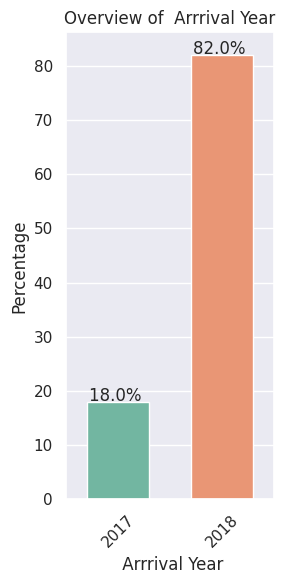

In [42]:
# Var plot on distribution of data by year
plot_bar_chart_percentage(df=df, column_name='arrival_year',xlabel=' Arrrival Year',pellete=pellete)


### Observations:
Most of the data belongs to 2018(around 82%)

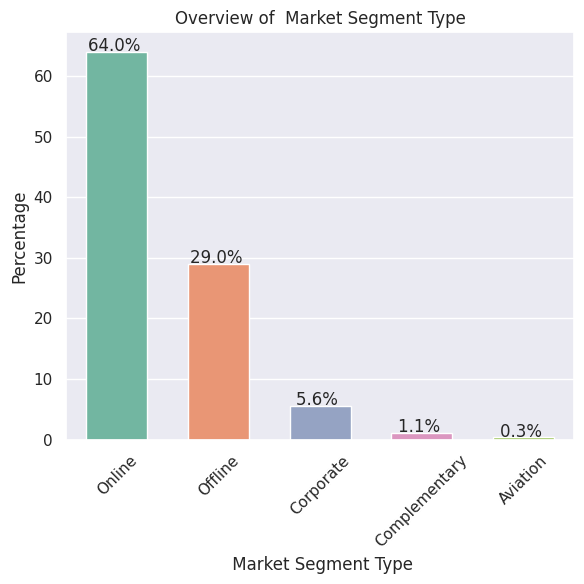

In [43]:
# bar plot for overview of marjet segment
plot_bar_chart_percentage(df=df, column_name='market_segment_type',xlabel=' Market Segment Type',pellete=pellete)

### Observations:
- Most of the guests preffered online booking we see this for around 64%.
- Corporate bookings account for approximately 5.6% of the total bookings.

- Around 1.1% of the bookings are made form complementary purposes.

- Bookings from the aviation sector constitute only 0.3% of the total bookings.

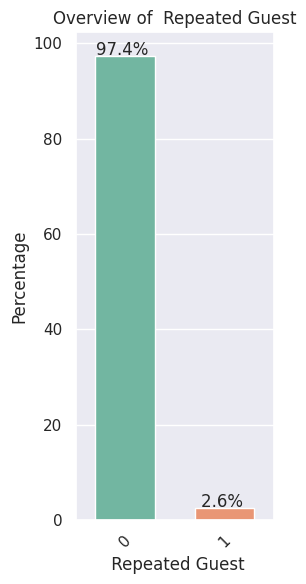

In [44]:
# Barplot on repeated guests columns
plot_bar_chart_percentage(df=df, column_name='repeated_guest',xlabel=' Repeated Guest',pellete=pellete)

### Observations:
Most of the guest around 97.4% are new guest.2.6% are from old guest list.So that means hotel has higher percentage of new guest.

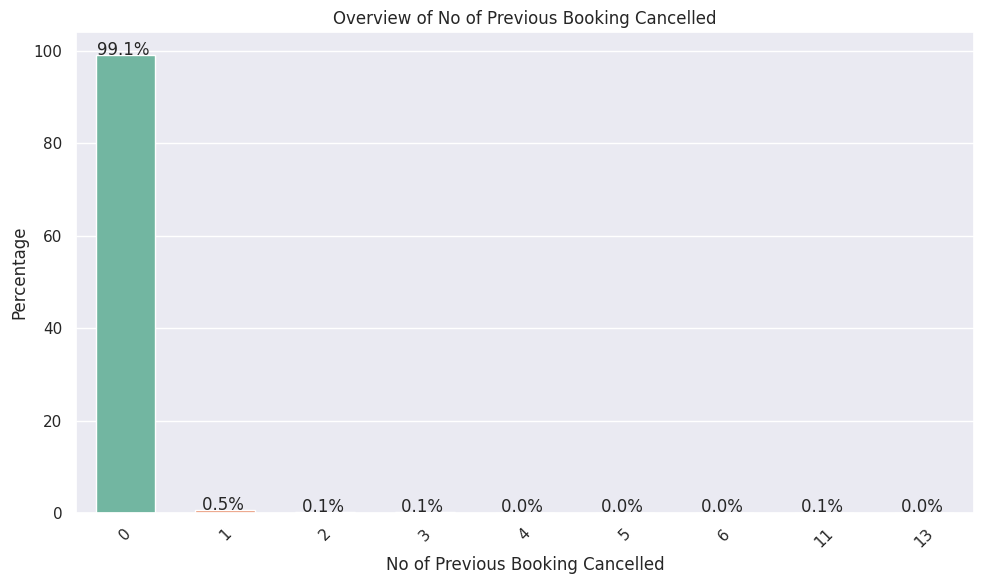

In [45]:
# Bar plot on booking cancelled
plot_bar_chart_percentage(df=df, column_name='no_of_previous_cancellations',xlabel='No of Previous Booking Cancelled',pellete=pellete)

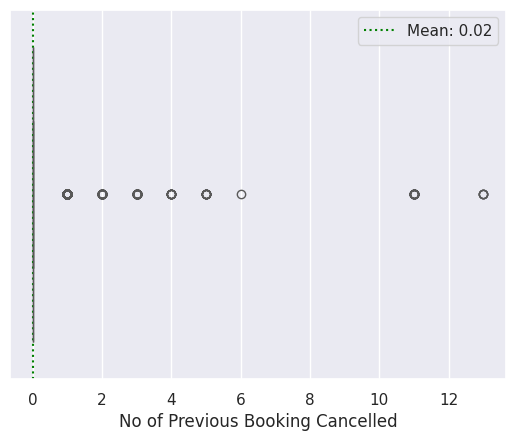

In [46]:
# Box plot for more overview on no of previous cancellation
draw_box_plot_with_legend(df=df,x='no_of_previous_cancellations',xlabel='No of Previous Booking Cancelled',color=colors[0]);

### Observations:
- Most of the customers have not cancelled the bookings .May be because majority are new guests as we had seen before.
- The Maximum of Number of previous bookings that were canceled by a guest is 13.
- The Mean of Number of previous bookings that were canceled is 0.02  and the Median of Number of previous bookings that were canceled is 0.0


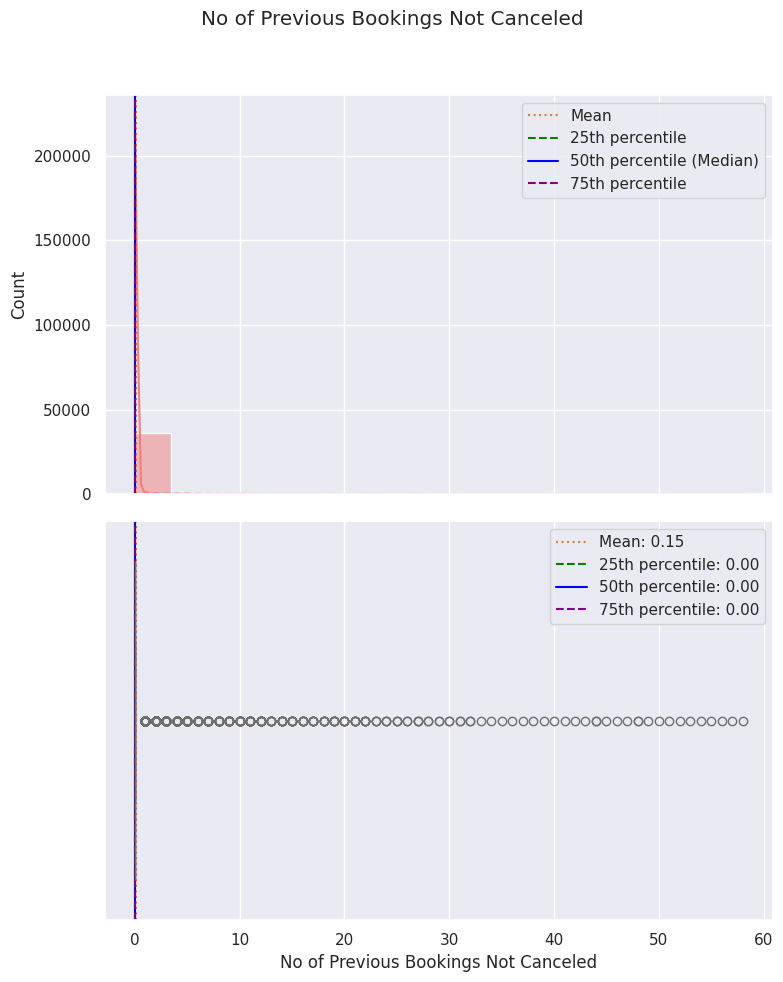

In [47]:
# Histogram and box plot to check the distribution of no_of_previous_bookings_not_canceled
plot_histogram_and_boxplot(df=df,column='no_of_previous_bookings_not_canceled',xlabel='No of Previous Bookings Not Canceled',ylabel='Count',title='No of Previous Bookings Not Canceled')

### Observations:
- As we had seen max no of booking thats not cancelled is near to 60
- Mean of bokkings not caneclled os 0.15

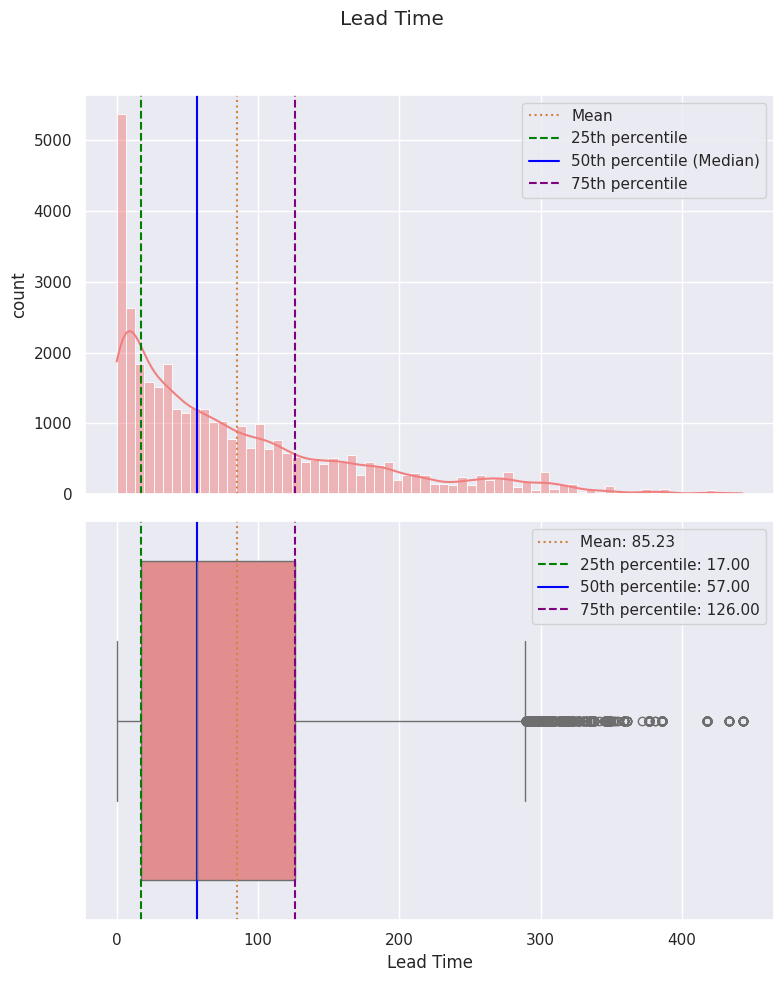

In [48]:
# Histogram and box plot to check the distribution of lead_time
plot_histogram_and_boxplot(df=df,column='lead_time',xlabel='Lead Time',ylabel='count',title="Lead Time")

### Observations:
We see the lead time is skewed towards right.Most of the bookings  are done close to arrival date.There are few outliers too for this column .
- Thats why the max value of this is 443 days.
- Some guests seems to have done spot booking or arrival day booking too.

Detail insights of this field is below

---
### Lead Time Statistics

| **Statistic**         | **Value**   |
|-----------------------|-------------|
| Mean                  | 85.23       |
| 25th Percentile       | 17.00       |
| 50th Percentile (Median) | 57.00    |
| 75th Percentile       | 126.00      |

### Observations:

1. **Mean Lead Time:** The average lead time is 85.23 days, which suggests a high skew in the data due to a small number of very long lead times.
2. **Median Lead Time:** The median is 57 days, indicating that half the bookings have lead times shorter than this value.
3. **Percentile Distribution:**
    - 25% of bookings have a lead time of 17 days or less.
    - 75% of bookings have a lead time of 126 days or less.
4. **Skewness:** The data is right-skewed, meaning a larger number of bookings have shorter lead times, but there are some extreme cases with very high lead times (outliers visible beyond 300 days).
5. **Outliers:** There are significant outliers beyond the 300-day mark, though most bookings cluster below 200 days.



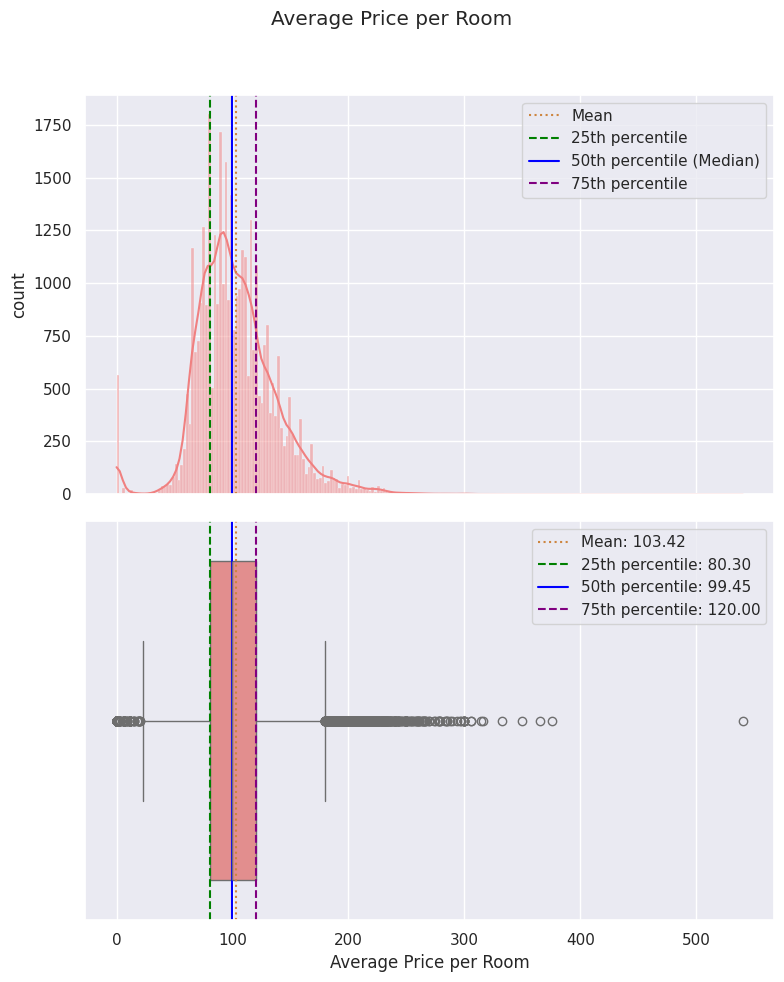

In [49]:
# Histogram and box plot to check the distribution of avg_price_per_room
plot_histogram_and_boxplot(df=df,column='avg_price_per_room',xlabel='Average Price per Room',ylabel='count',title="Average Price per Room")

### Observations:
- Average price of the room is not skewed seems to be normally distributed.
- Its strange that the sample has some room value  as zero which might need further analysis.
- Most of room priced around 100 EURO
- Max value for this field is 543 which is quite higher then majority of values.We might have to treat it with appropriate method (like clipping this with upper whisker) before creating model on this sample.

---
### Average Price Per Room

| **Statistic**         | **Value**   |
|-----------------------|-------------|
| Mean                  | 103.42      |
| 25th Percentile       | 80.30       |
| 50th Percentile (Median) | 99.45    |
| 75th Percentile       | 120.00      |




In [50]:
# 25th quantile
Q1 = df["avg_price_per_room"].quantile(0.25)

#  75th quantile
Q3 = df["avg_price_per_room"].quantile(0.75)

# IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [51]:
#replace with upper whisker value
df.loc[df['avg_price_per_room'] >= 500, 'avg_price_per_room'] = Upper_Whisker

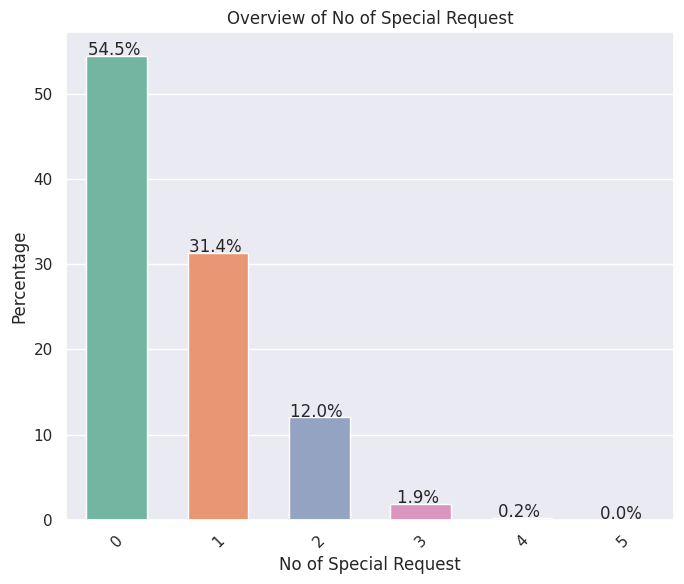

In [52]:
# Bar chart for overview of no of special requests
plot_bar_chart_percentage(df=df, column_name='no_of_special_requests',xlabel='No of Special Request',pellete=pellete)

### Percentage of Special Requests

| **No. of Special Requests** | **Percentage (%)** |
|-----------------------------|--------------------|
| 0                           | 54.5               |
| 1                           | 31.4               |
| 2                           | 12.0               |
| 3                           | 1.9                |
| 4                           | 0.2                |
| 5                           | 0.0                |

### Observations:

1. **Most Common Case:** Over half (54.5%) of the customers made **0 special requests**, indicating that a large majority prefer not to make additional requests.
2. **One Special Request:** 31.4% of the customers made **1 special request**, showing that nearly one-third of customers had minimal additional requirements.
3. **Two Special Requests:** 12.0% of customers made **2 special requests**, which indicates that multi-request customers are a small portion of the total.
4. **Very Few High Requests:** Requests for **3 or more** special accommodations are rare, accounting for only **2.1%** of the total, with **4** and **5** special requests almost negligible at **0.2%** and **0.0%**, respectively.
5. **General Trend:** The distribution shows a clear decline as the number of special requests increases, suggesting that fewer customers are making multiple requests.


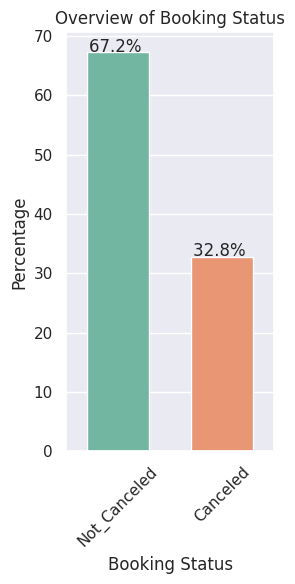

In [53]:
# Bar chart for bookings status
plot_bar_chart_percentage(df=df, column_name='booking_status',xlabel='Booking Status',pellete=pellete)

#Observations:
- 'Booking Status' shows the distribution of booking outcomes.
It reveals that a significant portion of bookings were 'Not Cancelled' (around 67%).
A smaller proportion of bookings were 'Cancelled' (around 33%).
This indicates a moderate level of booking cancellations
- Understanding the reasons for booking cancellations might involve
analyzing factors like lead time, average price per room,
market segment type, or repeated guests.


##Bivarite Analysis

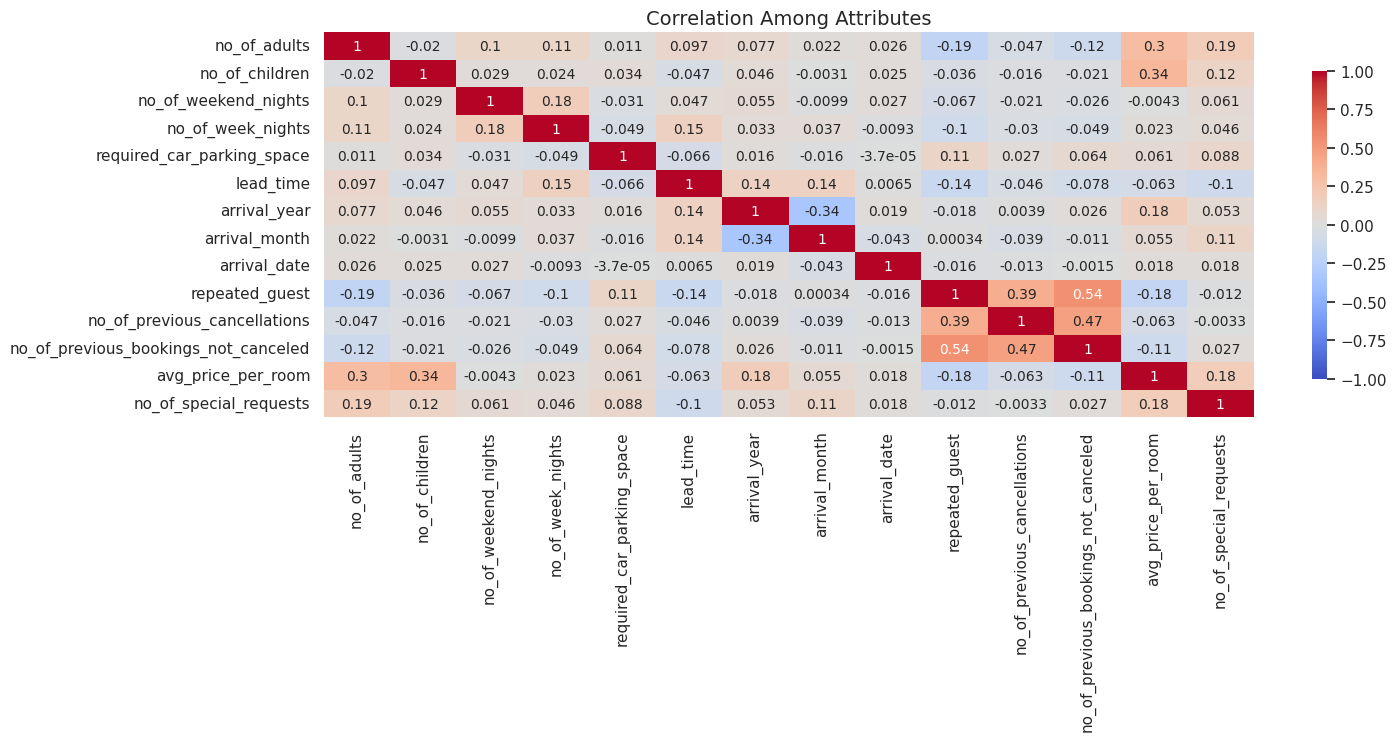

In [54]:
# Correalton between numerical Attributes using corr and heatmap
plt.figure(figsize=(15, 5))

# Create a heatmap to visualize the correlation matrix of the DataFrame
axis = sns.heatmap(
    df.corr(numeric_only=True),     # Calculate the correlation matrix for numerical columns only
    annot=True,                     # Annotate each cell with the correlation value
    vmin=-1, vmax=1,                # Set the range for the colormap from -1 to 1 (standard for correlation)
    cmap='coolwarm',                # Use the 'coolwarm' colormap, which ranges from blue (negative correlation) to red (positive correlation)
    annot_kws={'size': 10},         # Set the font size for the annotations inside the heatmap cells
    cbar_kws={'shrink': 0.8}        # Shrink the color bar to 80% of its default size to better fit the plot
)

# Set the title for the heatmap
axis.set_title('Correlation Among Attributes', fontsize=14) # Title with font size of 14

# Display the plot
plt.show()

### Observations:

The following provides an overview of the key correlations between various attributes from the correlation heatmap:

1. **Strongest Positive Correlations:**
    - **No. of previous bookings not canceled & No. of previous cancellations (0.47):** Customers with more previous cancellations also tend to have a higher number of previous bookings that were not canceled.
    - **Repeated guest & No. of previous bookings not canceled (0.54):** Guests who have not canceled previous bookings are more likely to be repeat guests.
    - **Avg. price per room & No. of children (0.34):** A higher number of children is associated with a higher average price per room.

2. **Strongest Negative Correlations:**
    - **Repeated guest & Lead time (-0.14):** Repeated guests generally have shorter lead times, indicating they may book closer to their arrival dates.
    - **Arrival month & Arrival year (-0.34):** A negative correlation here is likely due to the way data for arrival months and years is structured (seasonal trends).We have seen this in univarite as well where in later part of year there are more incoming guest.

3. **Weak Correlations:**
    - Many attributes show weak or no significant correlation. For example, **no. of children** has almost no correlation with **no. of previous bookings not canceled** (-0.021), and **arrival date** shows near-zero correlation with most other attributes.

4. **Avg. Price per Room:**
    - Positively correlated with **no. of children (0.34)** and **no. of adults (0.30)**, indicating that larger group sizes tend to book higher-priced rooms.
    - Negatively correlated with **lead time (-0.17)**, suggesting that bookings made closer to the arrival date might have a lower average price.

5. **No. of Special Requests:**
    - Positively correlated with **avg. price per room (0.18)**, showing that larger groups or those booking more expensive rooms tend to make more special requests.

### General Observations:
- There are relatively few strong correlations in the dataset, with most values close to 0, indicating weak linear relationships between many of the attributes.
- Some attributes, such as **lead time**, **arrival date**, and **arrival month**, tend to have limited influence on other factors, based on the weak correlations observed.


In [55]:
# It make sense to go for a trip with family not alone so grouping all family mebers together
## Combining all days to total days
df['no_of_members']=df['no_of_adults']+df['no_of_children']
df['total_days']=df['no_of_week_nights']+df['no_of_weekend_nights']

#### No Of Special Requests vs Booking Status




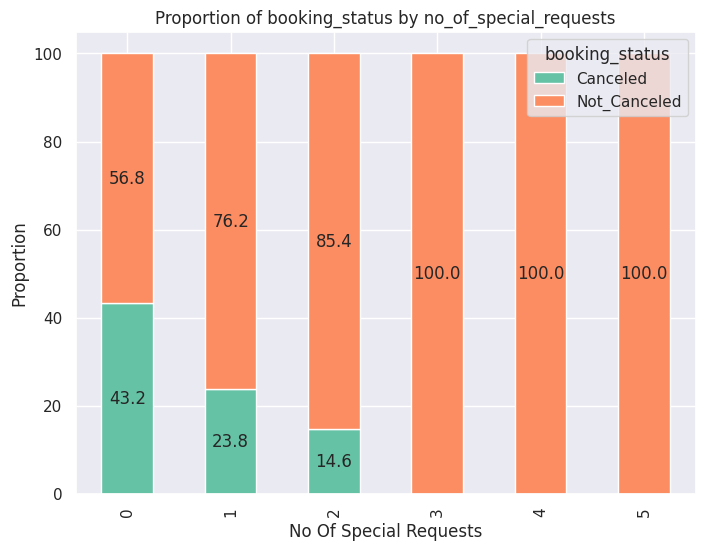

In [56]:
# Stacked bar chart for overview on booking status and special requests
plot_stacked_bar_with_annotations(df=df,x='no_of_special_requests',y='booking_status');

### Observations:
Guests with more special requests tends to cancel the booking less

#### No Of Guests vs Booking Status

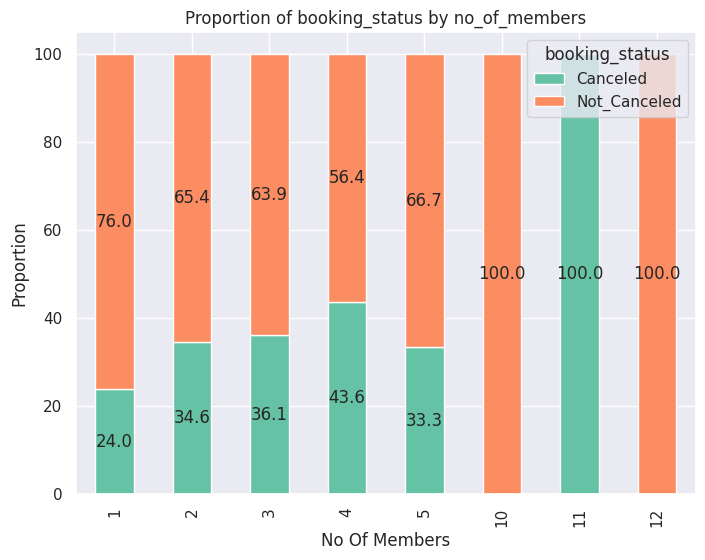

In [57]:
# Stacked bar chart for overview on booking status and no of total members
plot_stacked_bar_with_annotations(df=df,x='no_of_members',y='booking_status');

### Observations:
It seems family with 4 memebers has highest cancellation around 43.6%

#### Total Days vs Booking Status

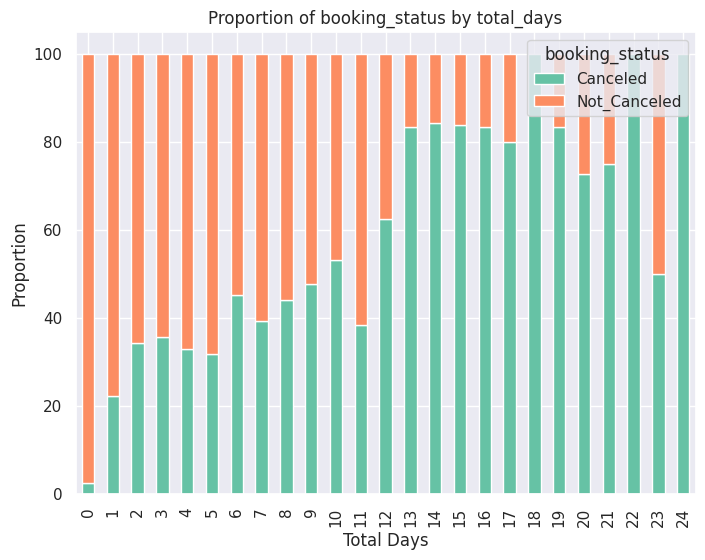

In [58]:
plot_stacked_bar_with_annotations(df=df,x='total_days',y='booking_status',show_annot=False);

### Observations:
Cancellation tends to increase with increase in the number of total days of stay.

### Type Of Meal Plan,Required Car Parking Space,Room Type Reserved,Market Segment Type vs Booking Status

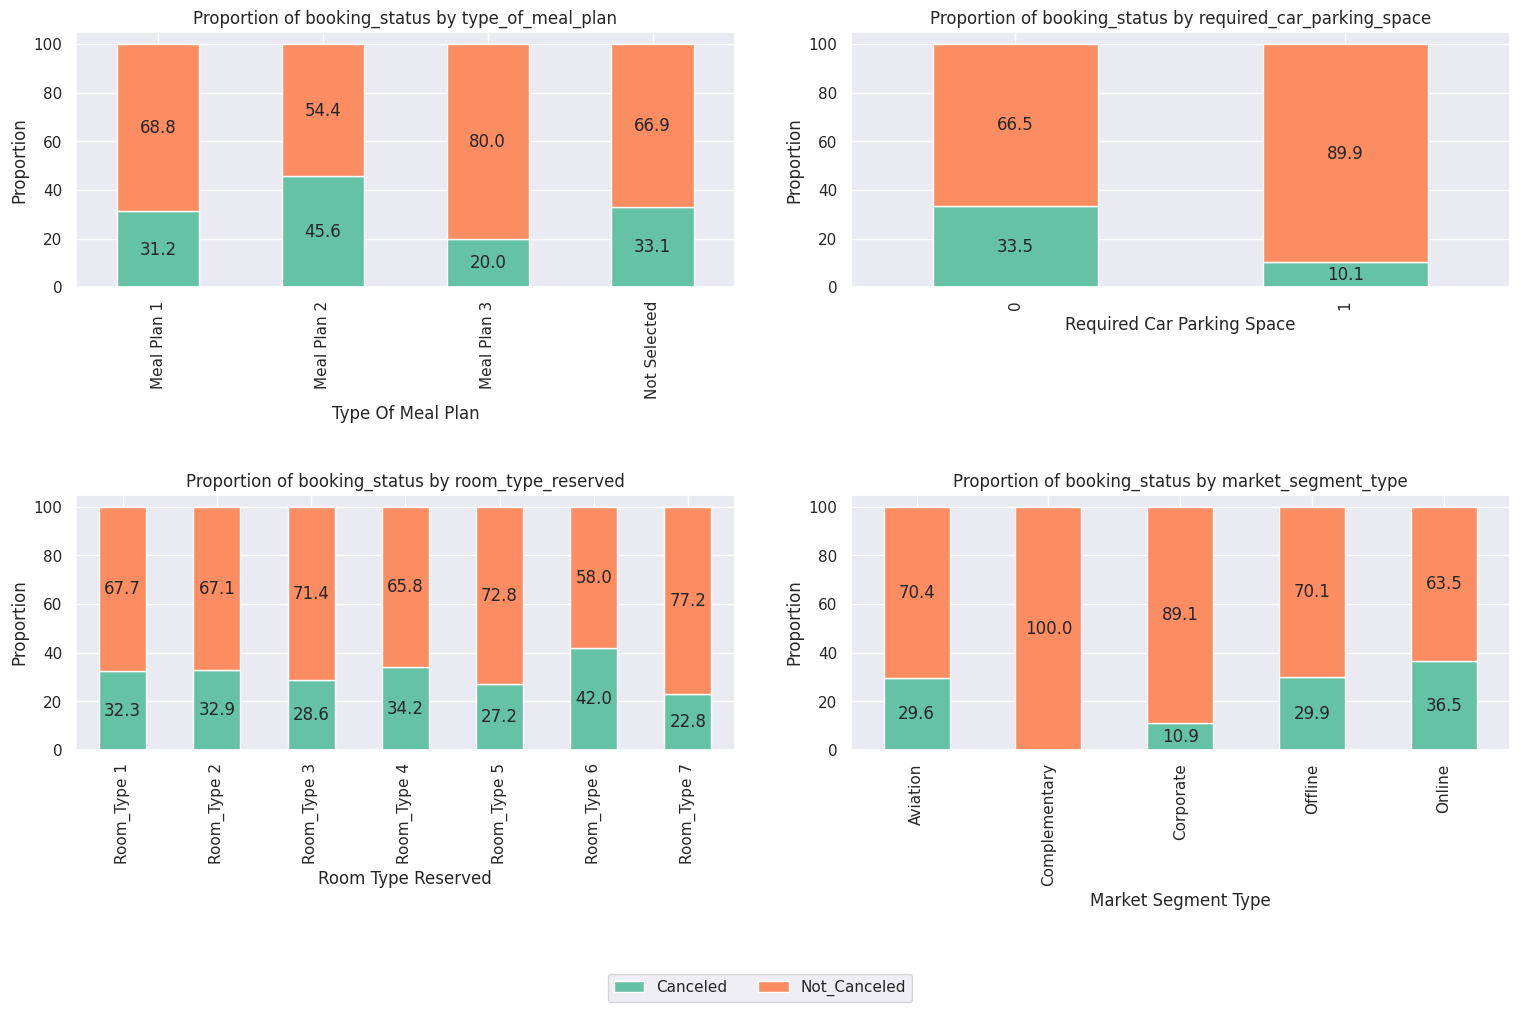

In [59]:
# Stack bar chart with booking status against other 4 features.We take only 4  to avoid to have scroll
columns=['type_of_meal_plan','required_car_parking_space','room_type_reserved','market_segment_type']
create_stacked_bar_subplots(df=df,columns=columns,y="booking_status")

### Overview:

1. **Type of Meal Plan:**
    - **Meal Plan 3** has the highest proportion of bookings that were not canceled (80%), while **Meal Plan 2** has the highest cancellation rate (45.6%).
    - The **Not Selected** category shows a moderate rate of cancellation (33%).

2. **Required Car Parking Space:**
    - Bookings that requires a parking space had a lower cancellation rate (10.1%) compared to guests who does not need parking.

3. **Room Type Reserved:**
    - All room type has similar kind of cancellation

4. **Market Segment Type:**
    - **Online** bookings show the highest proportion of canceled reservations (36.5%), while **Complementary** bookings have a 100% no cancellation rate.

### General Observations:
- Meal plan and parking preferences seem to play a role in the likelihood of booking cancellation, with certain meal plans and the presence of a parking request leading to lower cancellation rates.
- Market segment type also exhibit varying cancellation patterns.

### Repeated_guest,No Of Previous Cancellations vs Booking Status

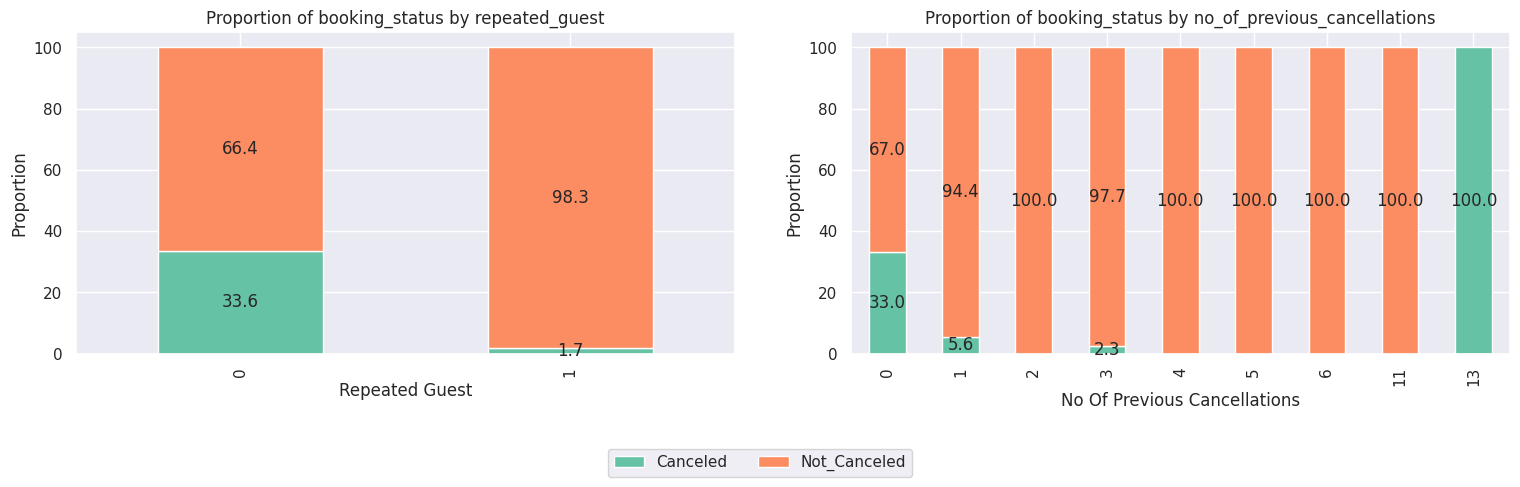

In [60]:
# Stack bar chart with booking status against other 2 features.
columns=['repeated_guest','no_of_previous_cancellations']
create_stacked_bar_subplots(df=df,columns=columns,y="booking_status")

### Observations:
- New guest has more cancellation where as repeated guest has ver less
- There is not much relation between previous cancellation and booking status


### Avg Price Per Room vs Booking Status

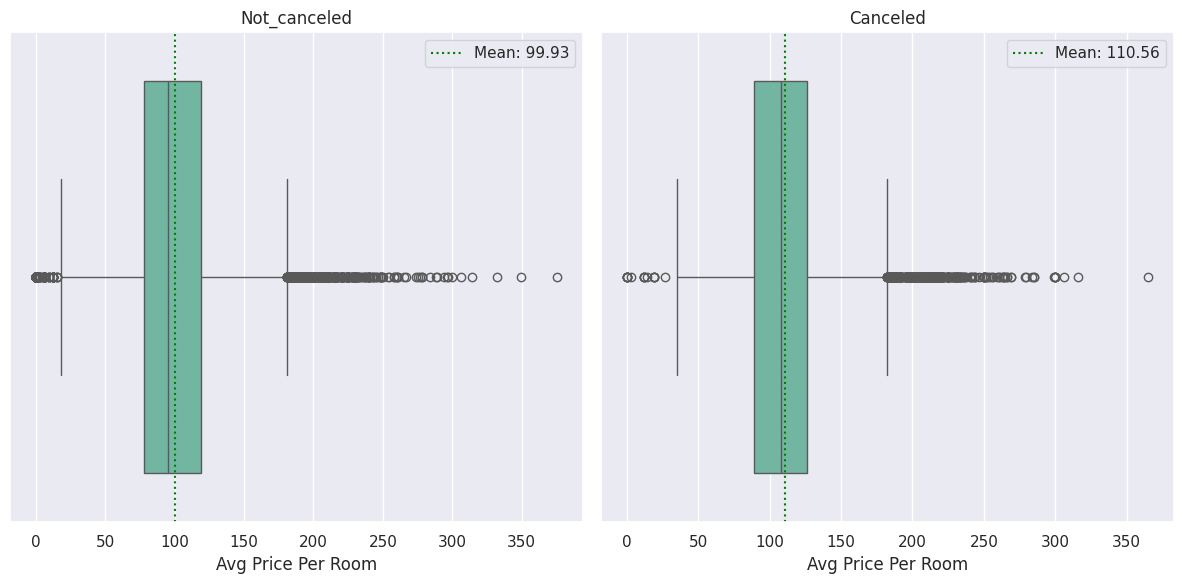

In [61]:
# Box plot for booking status vs avg price per room
plot_box_plot_side_by_side(df=df,x="avg_price_per_room",xlabel='Avg Price Per Room',category_col='booking_status',color=colors[0]);

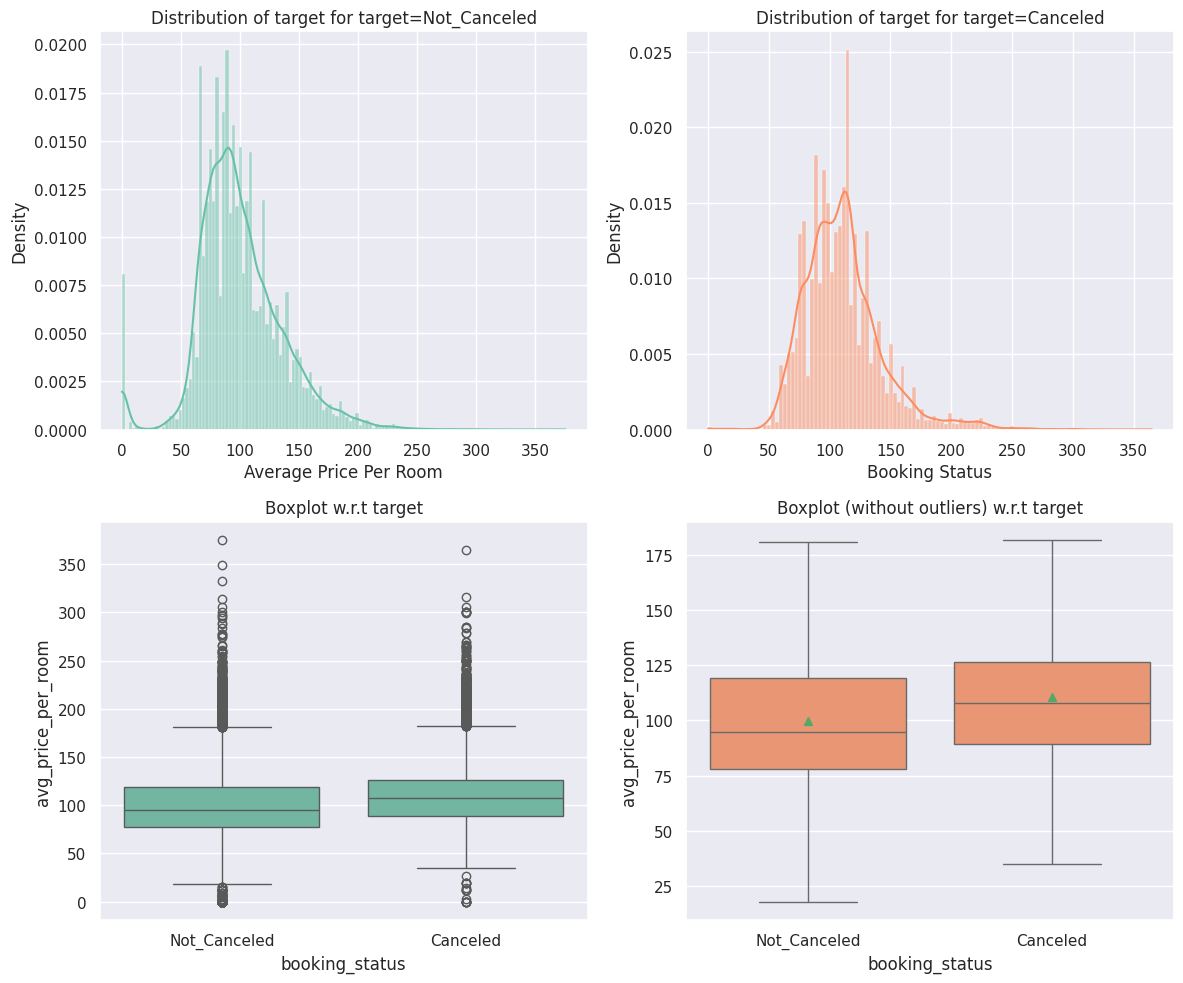

In [62]:
distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status",xlabel1="Average Price Per Room",xlabel2="Booking Status")

### Observations:
- It's observed that avg price of room for not cancelled (99.93)is lower then cancelled (110.59)
- Both the not cancelled and cancelled category has outliers

### Lead Time vs Booking Status

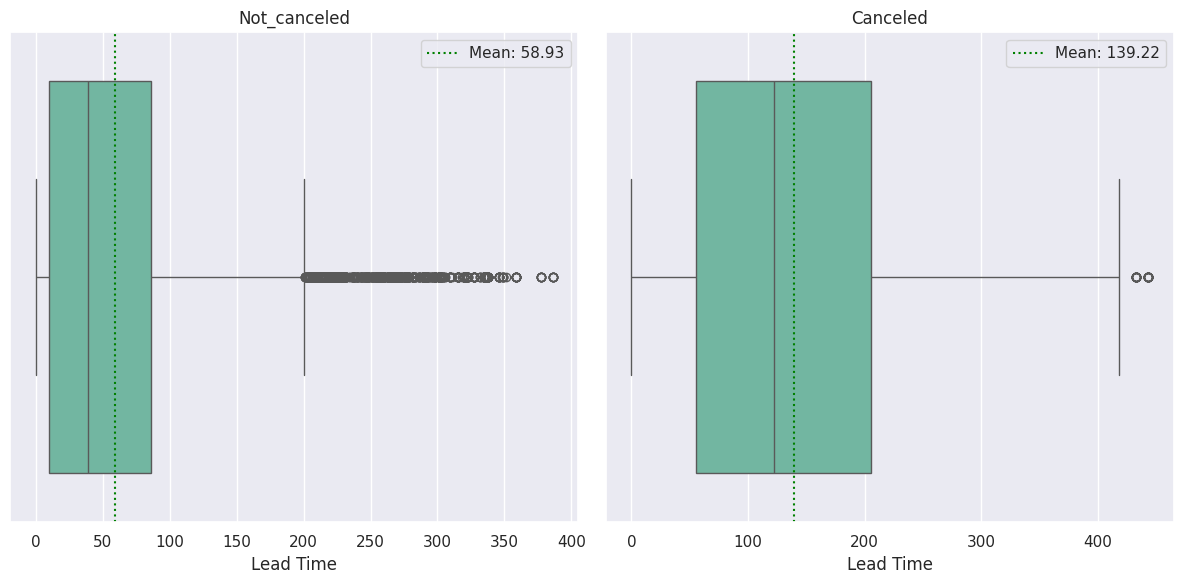

In [63]:
# Box plot for booking status vs lead time
plot_box_plot_side_by_side(df=df,x="lead_time",xlabel='Lead Time',category_col='booking_status',color=colors[0]);

### Observations:
- It's observed that lead time  for not cancelled (59)is lower then cancelled (139.22)
- Both the not cancelled and cancelled category has outliers.

#### EDA Questions

#### What are the busiest months in the hotel?


In [64]:
# Group by arrivakl month to find the count
tempDF=df.groupby('arrival_month').count()['booking_status'].reset_index()
tempDF['count']=tempDF['booking_status']
tempDF=tempDF.drop(columns=['booking_status'])
tempDF

,arrival_month,count
0,1,1014
1,2,1704
2,3,2358
3,4,2736
4,5,2598
5,6,3203
6,7,2920
7,8,3813
8,9,4611
9,10,5317


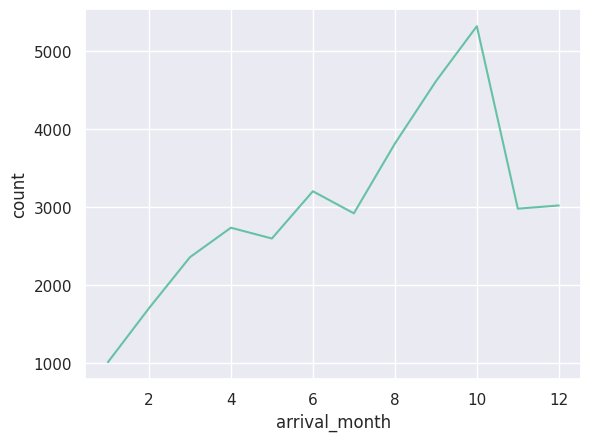

In [65]:
# We use line plot here as previoulsy done similar things with bar plot
sns.lineplot(data=tempDF,x='arrival_month',y='count',color=colors[0]);

### Observations:
The month of October has the highest booking activity, followed by September and August.
- After August no of guests increased and went down in Nov and Dec
- We had seen this with bar chart in univarite analysis as well

#### Which market segment do most of the guests come from ?

In [66]:
# Group it by market segment type and get teh count
df.groupby('market_segment_type').count()['booking_status'].reset_index()

,market_segment_type,booking_status
0,Aviation,125
1,Complementary,391
2,Corporate,2017
3,Offline,10528
4,Online,23214


In [67]:
# we can get the above with value count function as well
df['market_segment_type'].value_counts(normalize=True)

,proportion
market_segment_type,
Online,0.639945
Offline,0.290227
Corporate,0.055603
Complementary,0.010779
Aviation,0.003446


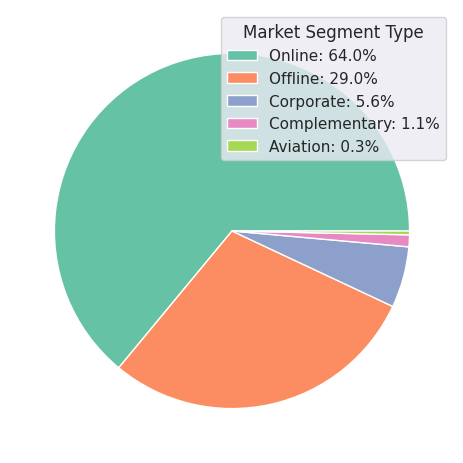

In [68]:
# Draw pi chart to show the share of each market segment type
plot_pie_chart_with_legend(df=df,column='market_segment_type',colors=colors[:5]);

### Observation:
- As its seen most guest comes from Online(64%)

#### Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

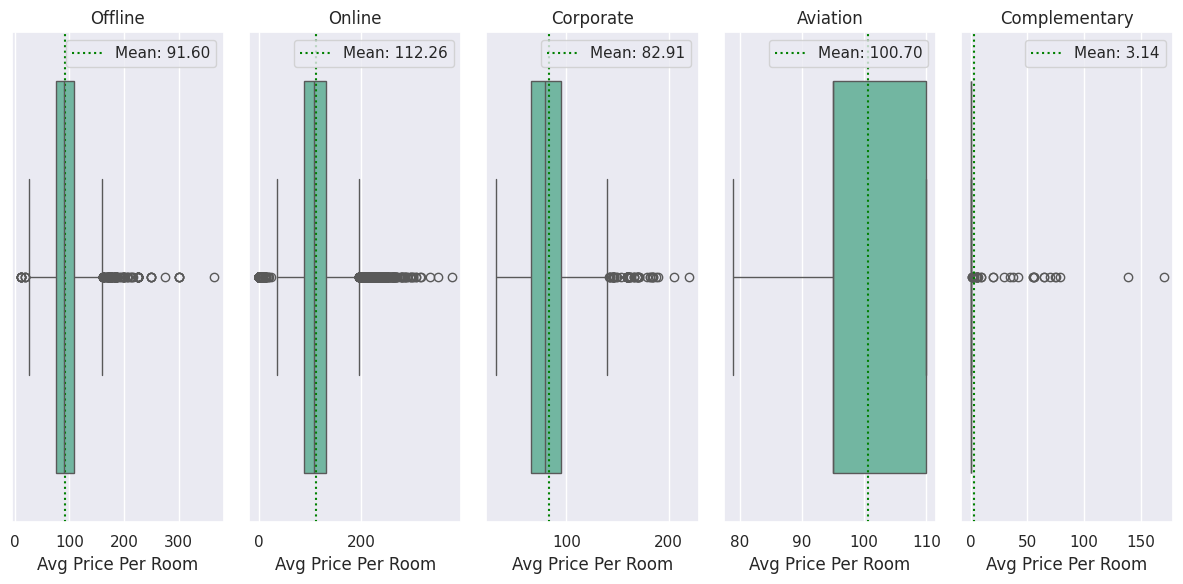

In [69]:
# Box plot to show the distribution of price across different market segment
plot_box_plot_side_by_side(df=df,x='avg_price_per_room',xlabel='Avg Price Per Room',category_col='market_segment_type',color=colors[0]);

### Observations:
- Online market segment has pricer room inbwteen 0-200 and can go up to 500 as well(there are some outliers aswell).Mean is at **112.26** which is highest amonth other category
- Offline market price is also same as online but online has more variations on price compared to offline.Mean is at **91.63**
- Corporate room prices are lesser then online and offline .Most of the prices(75%) are less then **100 Euro**.Mean is at **82.91**.
- Aviation prices distribution are also looks similar to corporate.Mean is at **100.70**
- Complementary shows average price as 0.

In [70]:
df.groupby(['arrival_month'])['avg_price_per_room'].mean()

,avg_price_per_room
arrival_month,
1,74.749763
2,80.733644
3,91.730835
4,101.998801
5,113.810677
6,111.966500
7,111.649318
8,113.203984
9,115.906916


### Observations
The price of rooms is highest during the months of  September, with an average price of around 115 EUR per room.

#### What percentage of bookings are canceled?

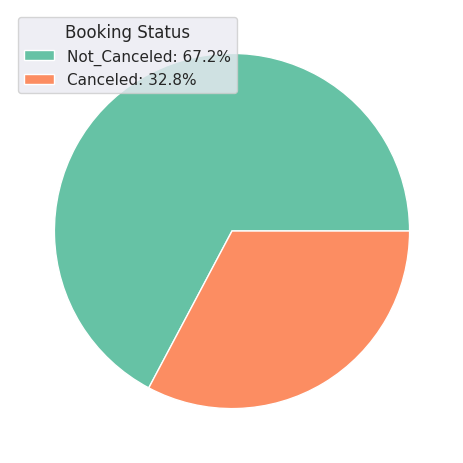

In [71]:
plot_pie_chart_with_legend(df=df,column='booking_status',colors=colors[:2]);

In [72]:
# Details overview on month wise cancellation
month_wise_df=df['arrival_month'].groupby(df['booking_status']).value_counts(normalize=True)
month_wise_df

booking_status  arrival_month
Canceled        10               0.158183
                9                0.129407
                8                0.125200
                7                0.110560
                6                0.108624
                4                0.083719
                5                0.079764
                11               0.073622
                3                0.058898
                2                0.036180
                12               0.033824
                1                0.002019
Not_Canceled    10               0.140918
                9                0.125994
                12               0.107380
                8                0.095326
                11               0.086306
                6                0.078393
                4                0.071382
                3                0.067979
                5                0.067651
                7                0.065847
                2                0.052235
                1                0.040590
Name: proportion, dtype: float64

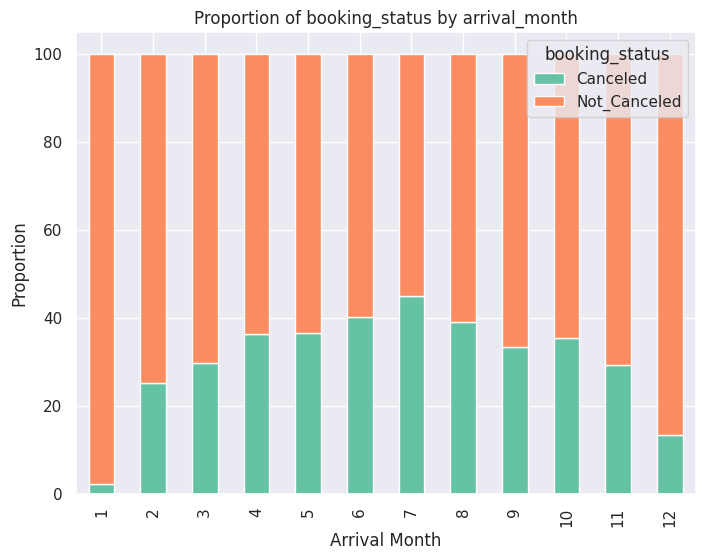

In [73]:
plot_stacked_bar_with_annotations(df=df,x='arrival_month',y='booking_status',show_annot=False);

### Observations:
- Around 32.8% booking are cancelled.We have detailed over view on this in univaraite and bivaraite analysis
- Even the busiest month i.e Aug,Sept and Oct has more cancellation as well

#### Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

In [74]:
#cancellation each month for repeated
cancelled_repeat_guest=df.groupby(['booking_status'])['repeated_guest'].value_counts(normalize=True)*100
cancelled_repeat_guest

booking_status  repeated_guest
Canceled        0                 99.865377
                1                  0.134623
Not_Canceled    0                 96.252563
                1                  3.747437
Name: proportion, dtype: float64

In [75]:
# Cross tabulation on bookstattus and repeated guests
pd.crosstab(df['repeated_guest'],df['booking_status'],normalize='index')*100

booking_status,Canceled,Not_Canceled
repeated_guest,,
0,33.580422,66.419578
1,1.720430,98.279570


### Observations:
The cancellation percenatage for repeated guest is quite less(1.7) compared to new .We had a stacked bar chart in bi varaite analysis for this

#### Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [76]:
# Group by booking_status and no_of_special_requests and calculate the count
grouped = df.groupby(['booking_status', 'no_of_special_requests']).size().reset_index(name='count')

# Calculate the proportion for each booking_status
grouped['proportion'] = grouped['count'] / grouped.groupby('booking_status')['count'].transform('sum') * 100

# Show the result
print(grouped)

  booking_status  no_of_special_requests  count  proportion
0       Canceled                       0   8545   71.897350
1       Canceled                       1   2703   22.742953
2       Canceled                       2    637    5.359697
3   Not_Canceled                       0  11232   46.051661
4   Not_Canceled                       1   8670   35.547355
5   Not_Canceled                       2   3727   15.280853
6   Not_Canceled                       3    675    2.767528
7   Not_Canceled                       4     78    0.319803
8   Not_Canceled                       5      8    0.032800


In [77]:
# Cross tab on booking status and no of special requests
pd.crosstab(df['no_of_special_requests'],df['booking_status'],normalize='index')*100

booking_status,Canceled,Not_Canceled
no_of_special_requests,,
0,43.206755,56.793245
1,23.766816,76.233184
2,14.596700,85.403300
3,0.000000,100.000000
4,0.000000,100.000000
5,0.000000,100.000000


### Observations:
The guests who has more  than 2 special requests are less likely to cancel the bookings.We had already covered the plot in bi variate analysis.

## Model Building

### Outlier Detection and Treatment

In [78]:
# Drop columns which we created
df.drop(columns=['total_days'],inplace=True)
df.drop(columns=['no_of_members'],inplace=True)

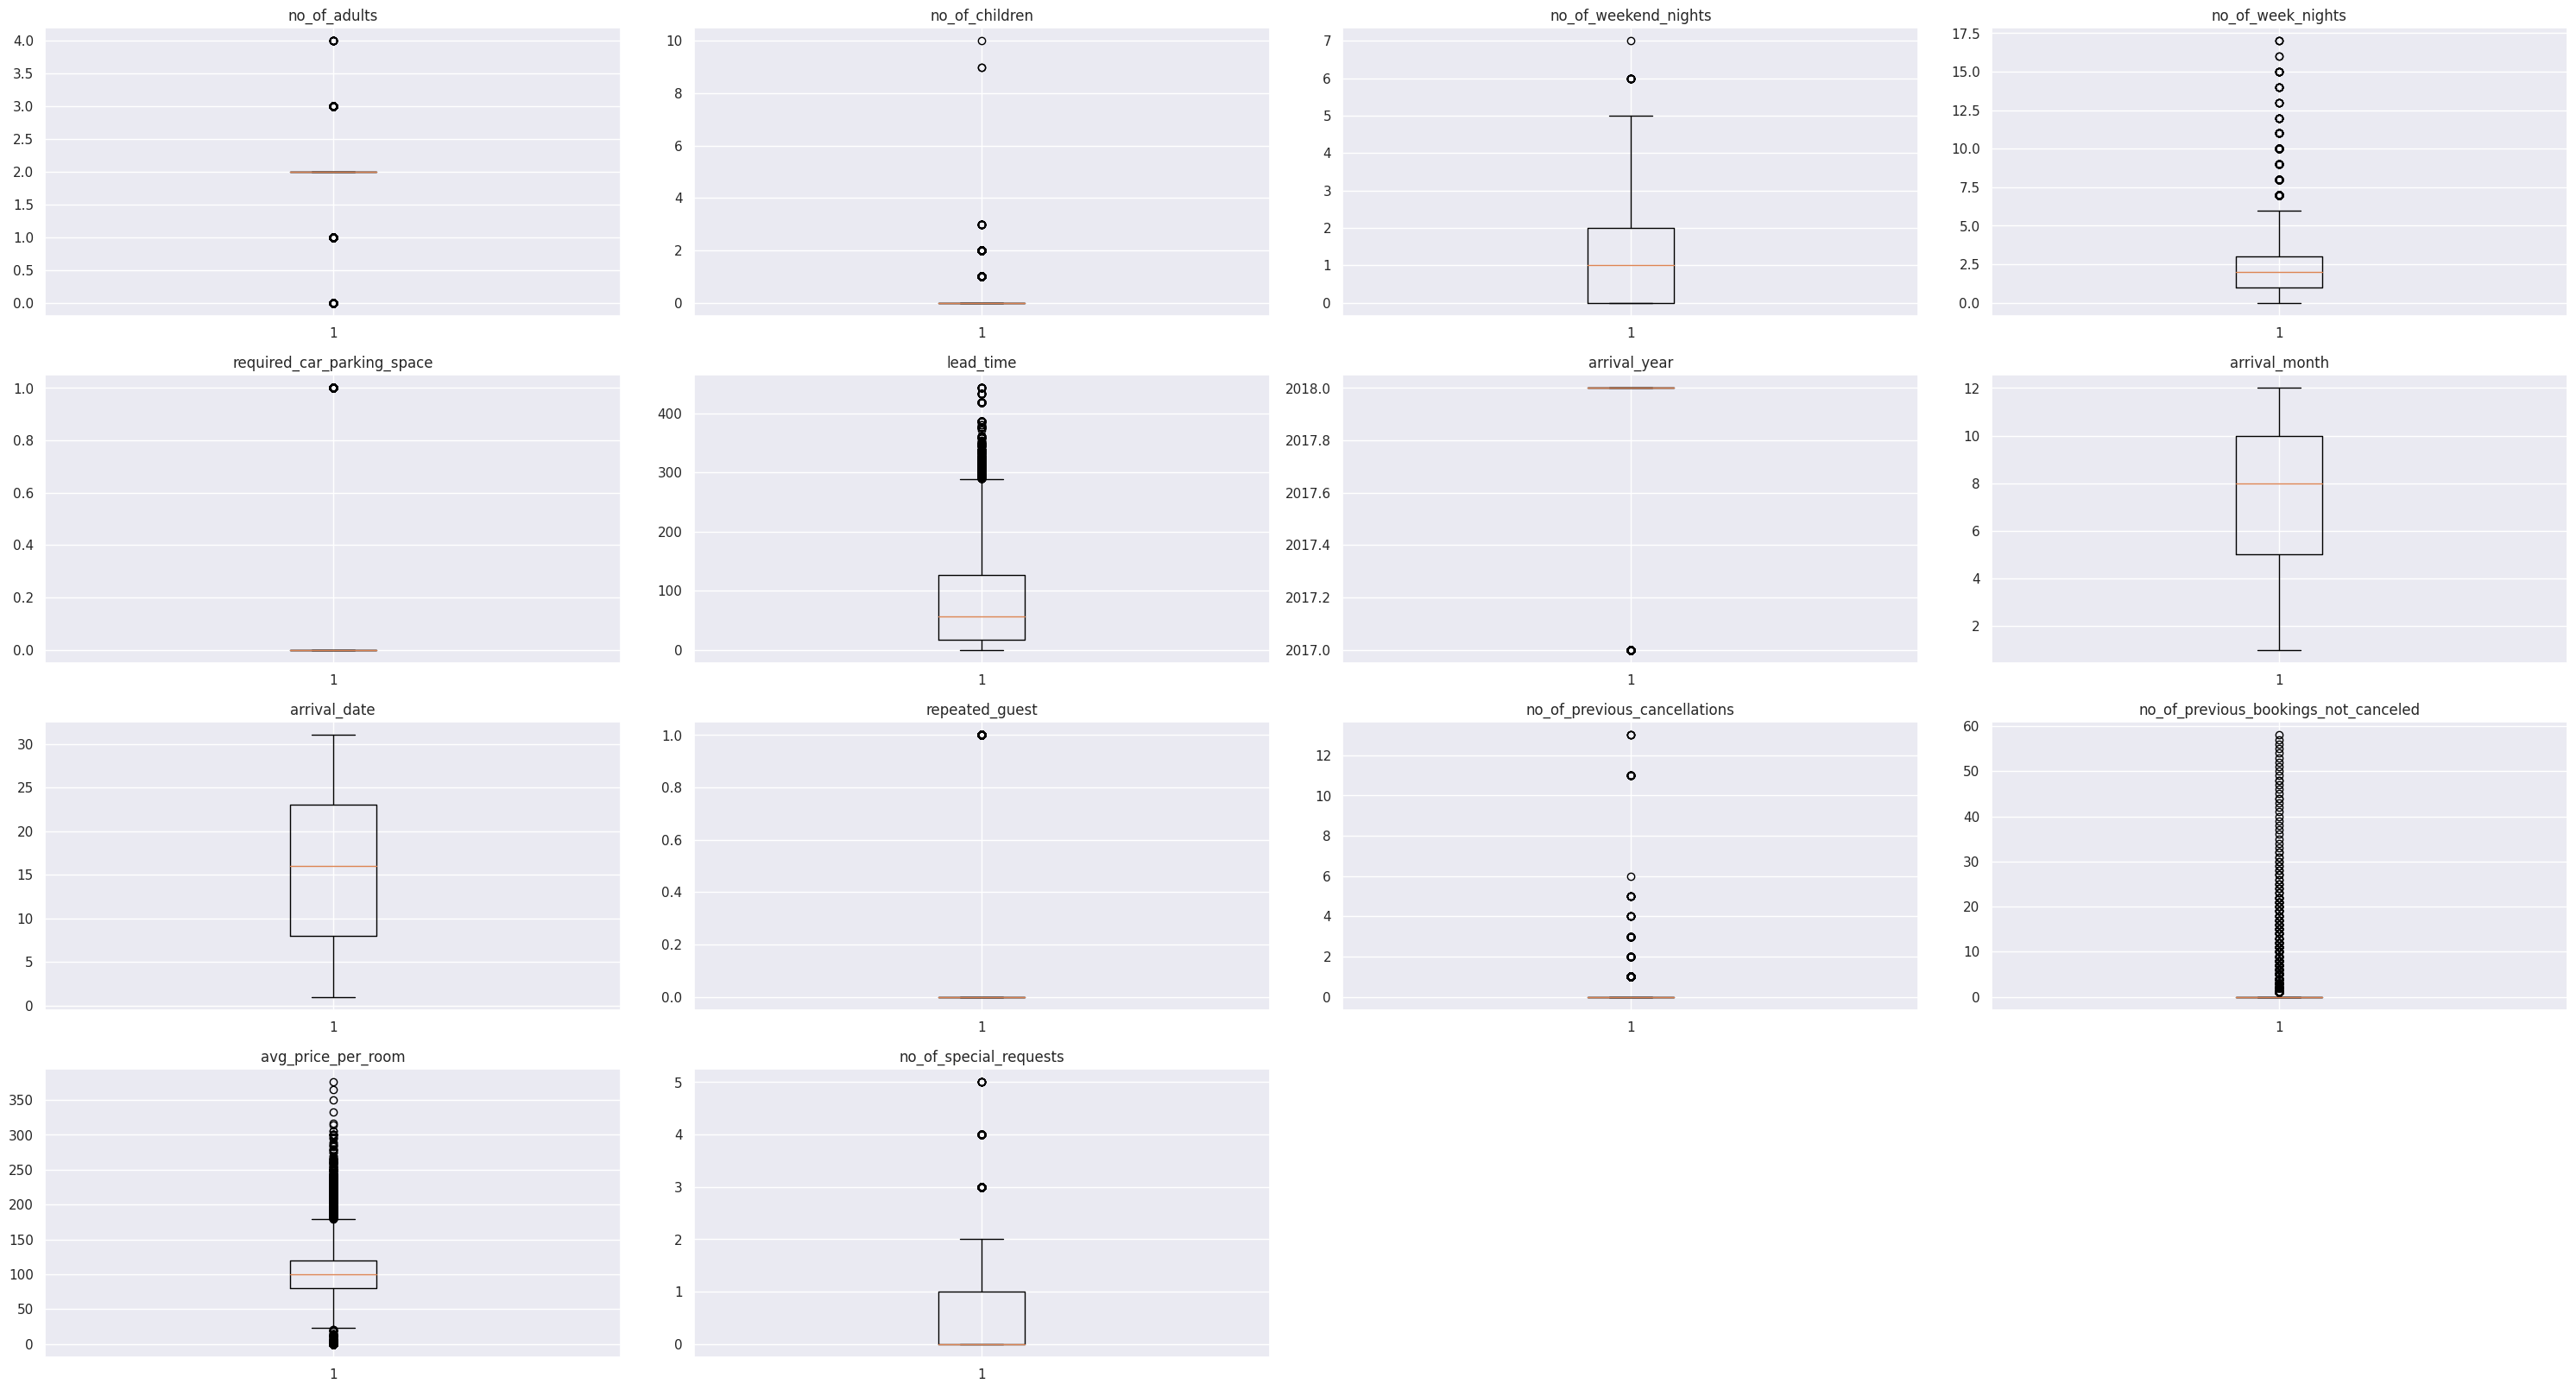

In [79]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(30, 20))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Observation:
Few outliers in the data, but we did not treat as they are considered as proper values



## Data Processing

#### We will make the booking status field as integer with cancelled as 1 and not cancelled as 0 before creating any model

In [86]:
# Apply the label encoder to convert canceled as 1 and not cancelled as 0

label_encoder = LabelEncoder()
df['booking_status_encoded'] = label_encoder.fit_transform(df['booking_status'])
df.drop(columns=['booking_status'],inplace=True) # drop old booking sttaus column
# df.rename(columns={'booking_status_encoded':'booking_status'},inplace=True) # rename the column

In [87]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status_encoded
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,1
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,1
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,0
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,1
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,0
